# Data Description:  
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. 

Domain:  Object recognition 

Context: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. Attribute Information:  All the features are geometric features extracted from the silhouette.   All are numeric in nature. 
 
Learning Outcomes:  
1. Exploratory Data Analysis 
2. Reduce number dimensions in the dataset with minimal information loss
3. Train a model using Principle Components 
 
Objective:  
Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data. 
Steps and tasks: 
1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks) 
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points) 
3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks) 
4. Train a Support vector machine using the train set and get the accuracy on the test set (10 marks) 
5. Perform K-fold cross validation and get the cross validation score of the model (10 marks) 
6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (10 points) 
7.  Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) (10 marks) 
8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings (5 points) 

References: 
1. Book on PCA 
2. Application of PCA for image compression 

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split

from scipy.stats import zscore
from sklearn import metrics
from sklearn import datasets

In [2]:
#read the dataset
vehicle_df = pd.read_csv('vehicle.csv')

In [3]:
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
vehicle_df.shape

(846, 19)

In [5]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
#changing the class variable to numeric format
replace = {"class":{"van": 0, "car": 1, "bus":2}}
vehicle_df = vehicle_df.replace(replace)
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [7]:
#checking the 5 point summary
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    1.022459    0.702130    0.0    1.00   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
class                          1.0    2.0     2.0

There seems to be some irregularity in the count of the columns. Lets check for the non numeric values

In [8]:
vehicle_df.isnull().apply(pd.value_counts)

compactness  circularity  distance_circularity  radius_ratio  \
False        846.0          841                   842           840   
True           NaN            5                     4             6   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
False                   844                    846.0            845   
True                      2                      NaN              1   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
False            845                     843                      846.0   
True               1                       3                        NaN   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
False              843                844                        844   
True                 3                  2                          2   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
False                          842             840               845   
True                             4               6                 1   

       skewness_about.2  hollows_ratio  class  
False               845          846.0  846.0  
True                  1            NaN    NaN

In [9]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

- Multiple rows are there with null or non numeric values
- We can either get those rows removed which has null values or apply median function for those null values
- By removing the rows we may loose valuable information for the model to understand the data and by applying median to null values we may have updated wrong values for the missing datas
- We will a model, with null values being replaced by median 

# Applying median to all null values

In [10]:
medianFiller = lambda x: x.fillna(x.median())
vehicle_df = vehicle_df.apply(medianFiller,axis=0)
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

converting the class datatype to categorical in the original copy for our exploratory analysis

In [11]:
vehicle_df['class'] = vehicle_df['class'].astype('category')
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [12]:
#changing the class variable back to string so that it helps in data visuals 
replace = {"class":{0:"van", 1: "car",2:"bus"}}
vehicle_df = vehicle_df.replace(replace)
#converting our class variable to categorical for exploratory analysis 
vehicle_df['class'] = vehicle_df['class'].astype('category')
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [13]:
vehicle_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107         44.0                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0         167.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

car    429
bus    218
van    199
Name: class, dtype: int64


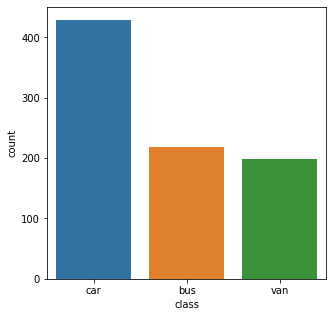

In [14]:
#Checking the count of our class distribution across the data
print(vehicle_df['class'].value_counts())

fig, ax = plt.subplots(figsize=(5,5))
ax=sns.countplot(data = vehicle_df, x= 'class',orient = 'h', order = vehicle_df['class'].value_counts().index) 
plt.show()

There are more cars in the data set followed by Bus and van

Applying a pair plot to see how the class is distributed among the independent variables as well as look out for the data spread and correlation

<Figure size 1080x1080 with 0 Axes>

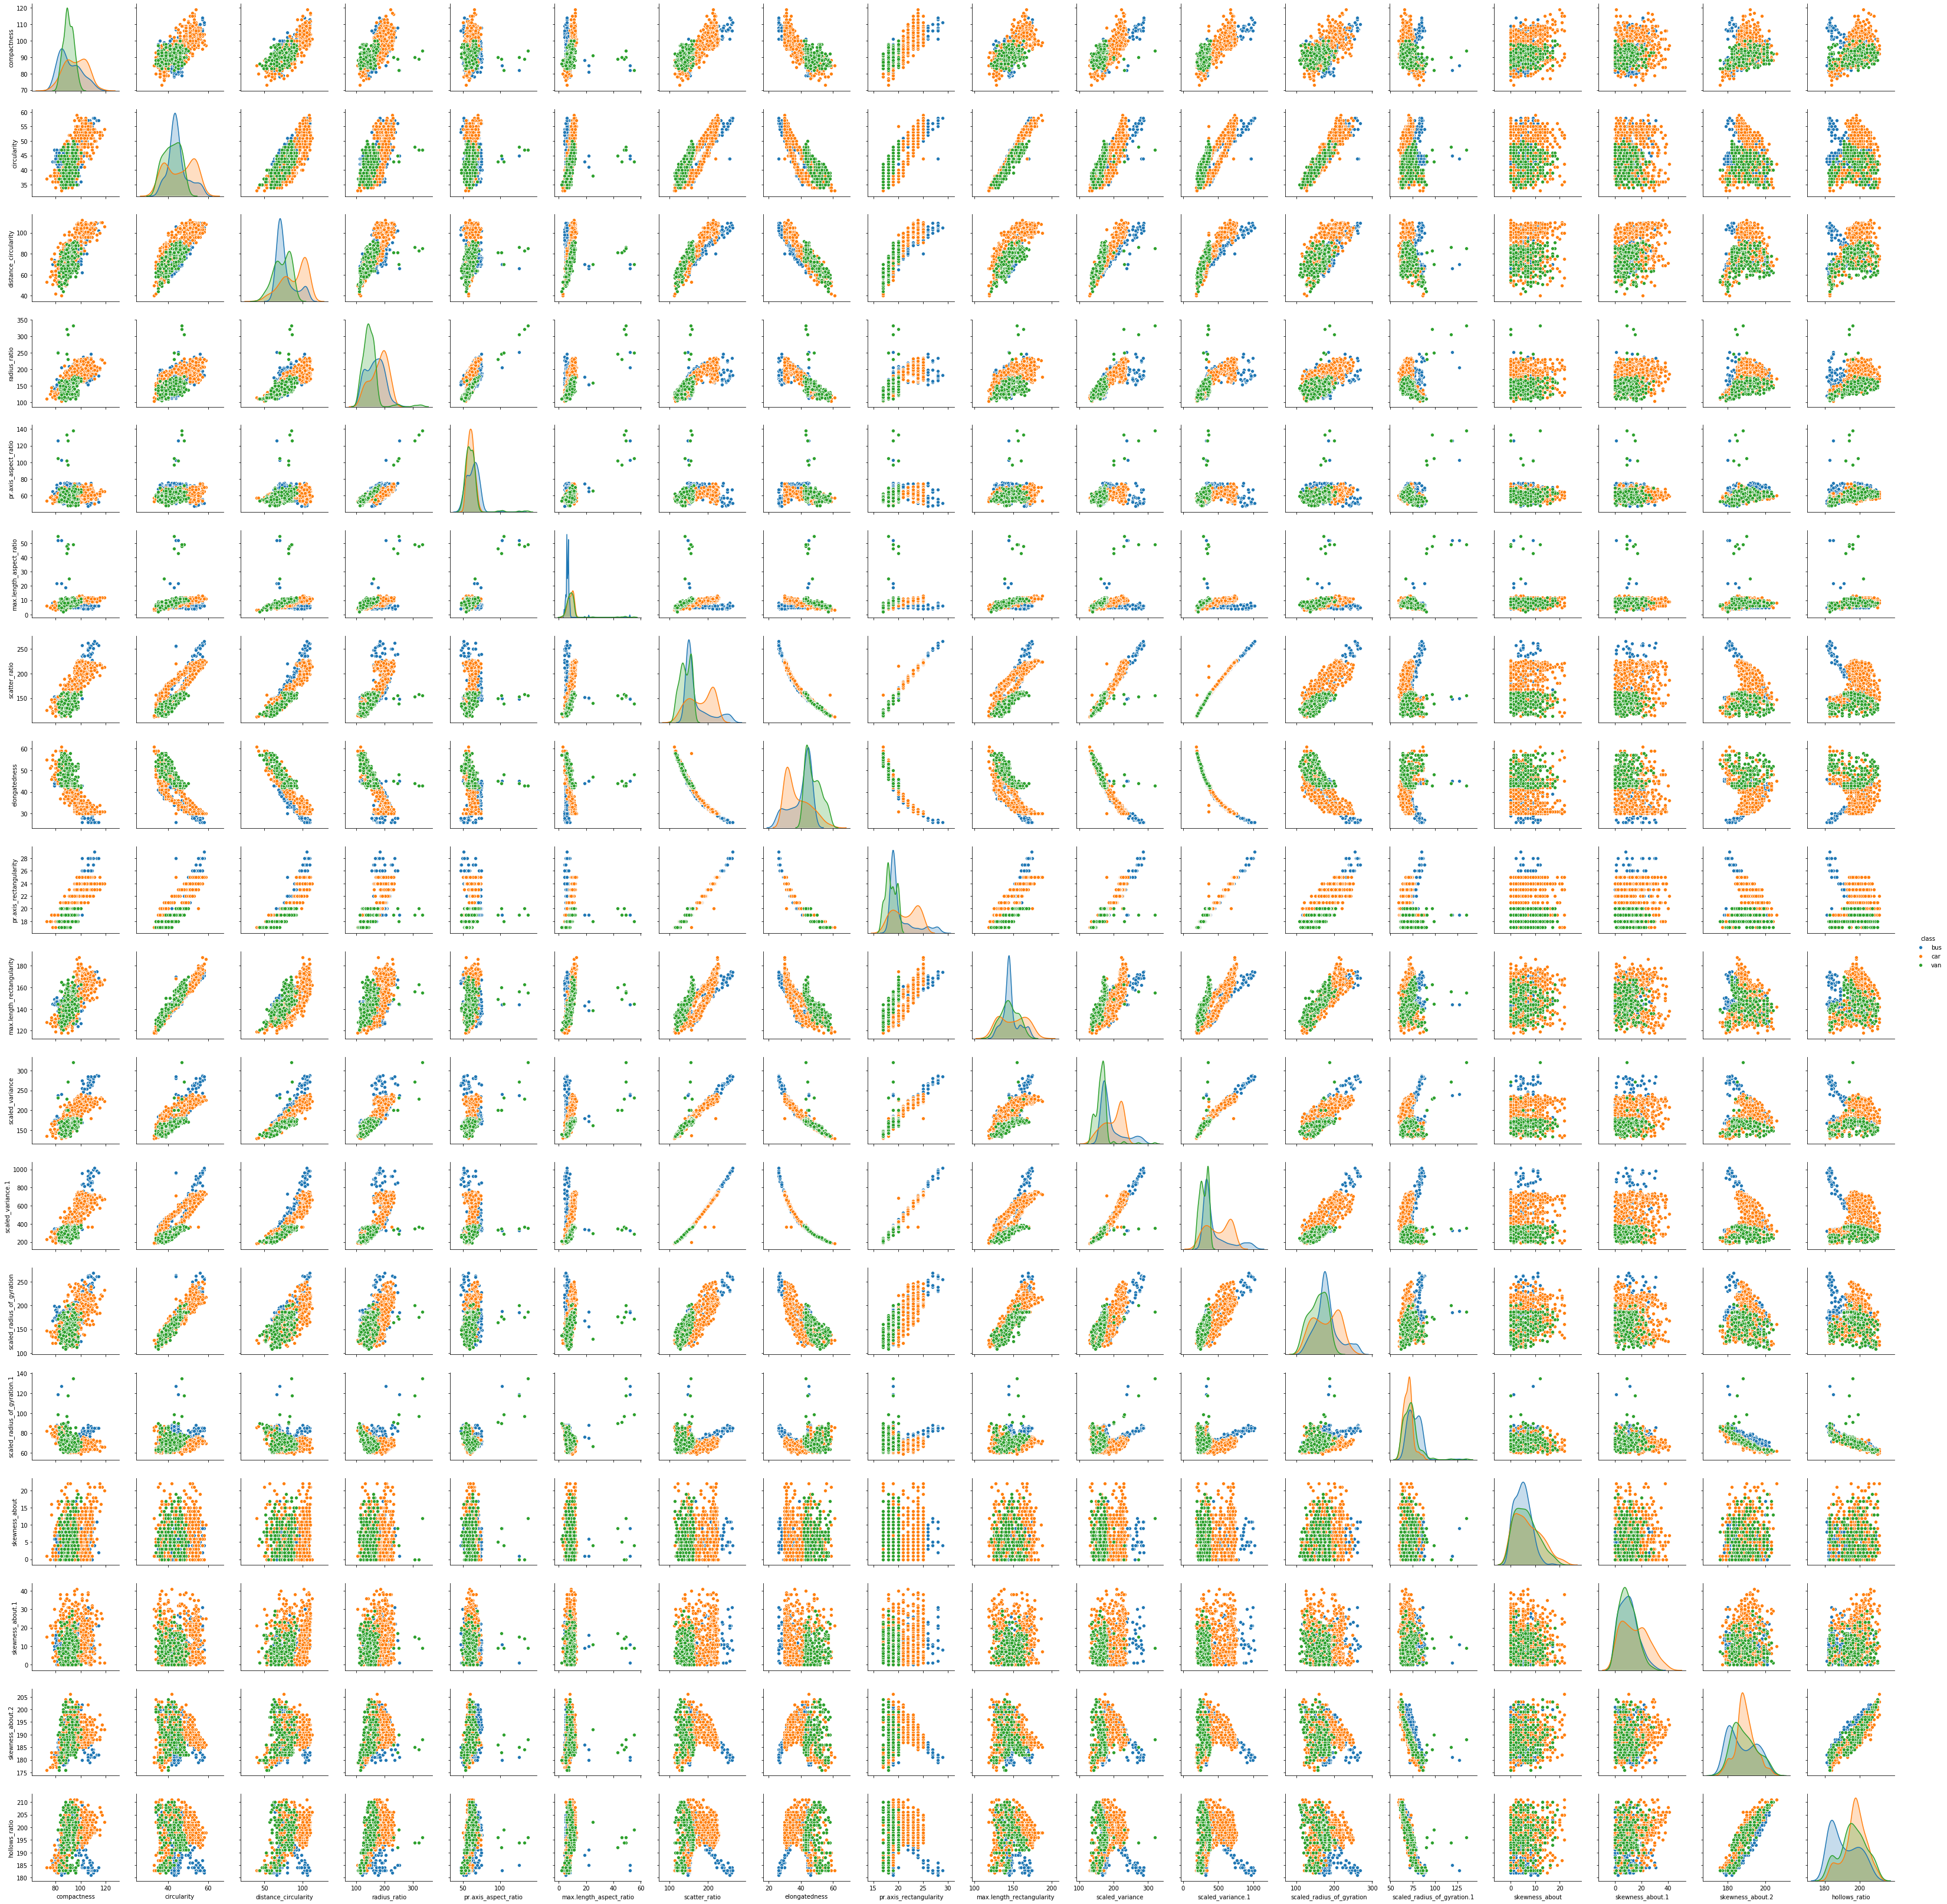

In [15]:
plt.figure(figsize = (15,15))
sns.pairplot(vehicle_df, diag_kind='kde',hue='class')
plt.show()
#Note: the output takes some time to print since we are applying pairplot for 18 variables with hue of their class variable

- Across the diagonals we can see that there is no normal distribution among the curve.
- By looking the visual curves, we can see that there could atleast be 3 classes or more. 
- In the scatter plots, there are many columns that has high positive correlation, which means that they may not be a useful for the model building for the classification
- We can also see several scatter plots as a cloud which indicates that they might be useful for the model building

In [16]:
#checking the coorelation between variables
vehicle_df.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                              0.015599       0.074458   
skewness_about.1                            0.043422       0.212428   
skewness_about.2                           -0.

-  compactness, circularity, distance circularity, radius ratio has lot of positive correlation with other features
-  elongatedness is negatively correlated to most of the features
-  There is high positive correlation between skewness_about.2 and hollows_ratio.
-  There is high negative correlation between scaled_radius_of_gyration.1 and skewness_about.2, hollows_ratio

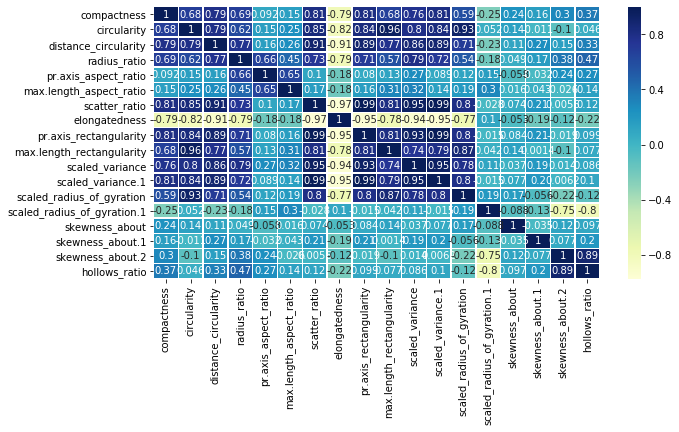

In [17]:
#lets view them visually
plt.figure(figsize=(10,5))
sns.heatmap(vehicle_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cmap="YlGnBu")
plt.show()

- There are high correlation among several varaibles (circularity,distance_circularity,max.length_rectangularity,scaled_radius_of_gyration,elongatedness) which may be discarded for our model building. 
- Some of the variables like pr.axis_aspect_ratio,max.length_aspect_ratio,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio has less correlation and seem to be more independent and those variables can be useful for the model

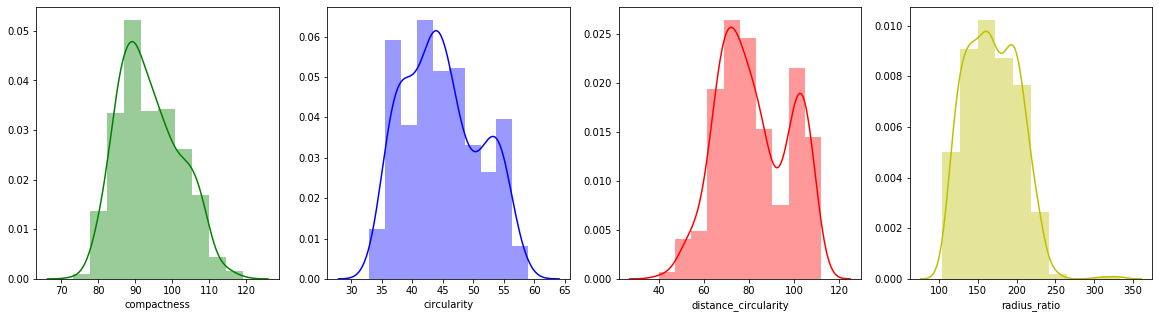

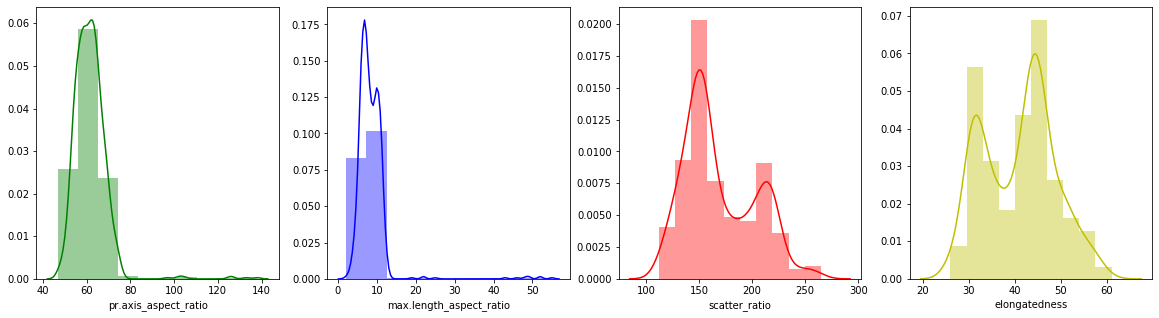

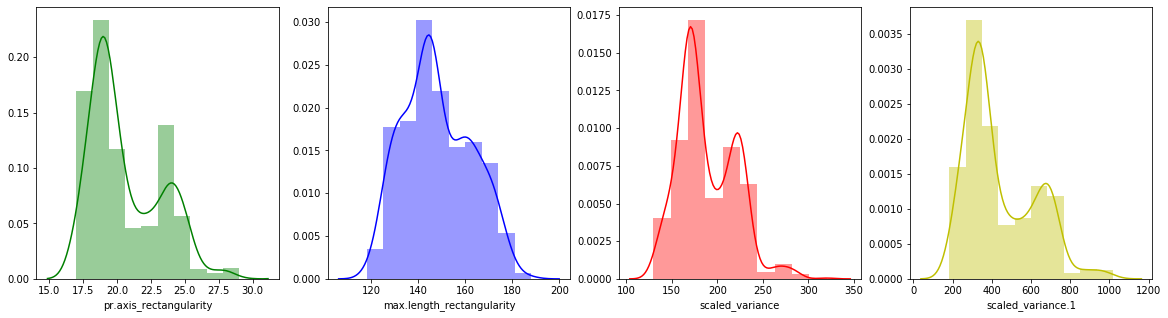

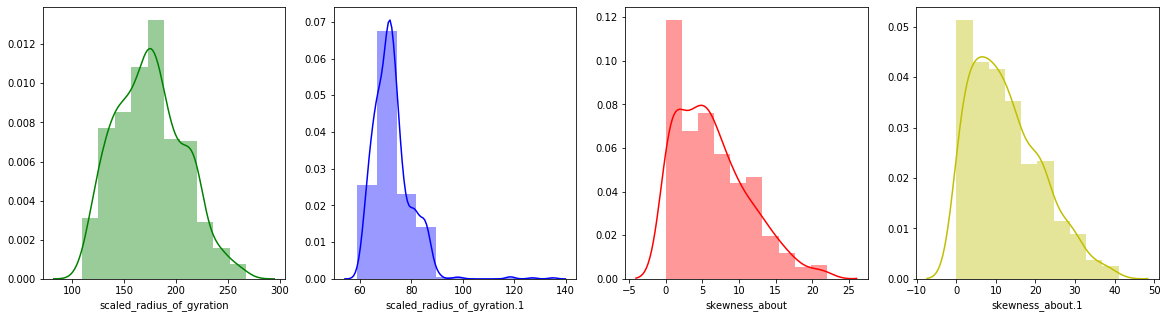

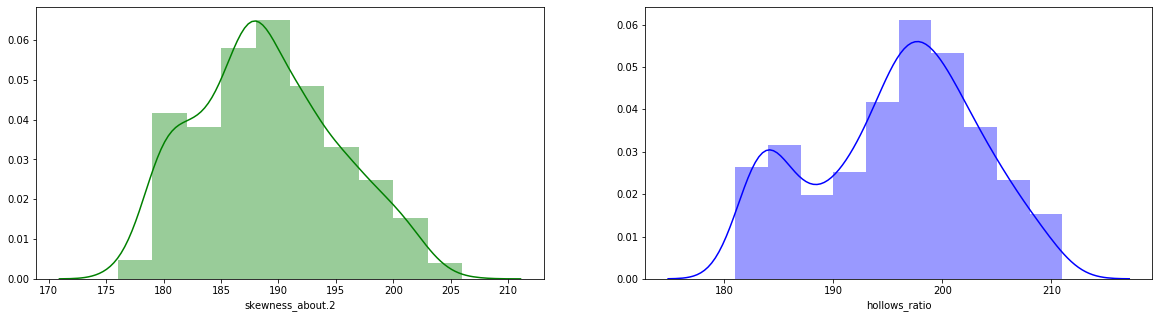

In [18]:
# Perform some distribution on the columns
#analyze the distribution of our columns
f, ax = plt.subplots(1, 4, figsize=(20,5))
plt1 = sns.distplot(vehicle_df["compactness"],bins=10, ax= ax[0],color = 'g',)
plt2 = sns.distplot(vehicle_df["circularity"],bins=10, ax=ax[1], color = 'b')
plt3 = sns.distplot(vehicle_df["distance_circularity"],bins=10, ax= ax[2], color = 'r')
plt4 = sns.distplot(vehicle_df["radius_ratio"],bins=10, ax=ax[3],color = 'y')
#analyze the distribution of our columns
f, ax = plt.subplots(1, 4, figsize=(20,5))
plt1 = sns.distplot(vehicle_df["pr.axis_aspect_ratio"],bins=10, ax= ax[0],color = 'g')
plt2 = sns.distplot(vehicle_df["max.length_aspect_ratio"],bins=10, ax=ax[1], color = 'b')
plt3 = sns.distplot(vehicle_df["scatter_ratio"],bins=10, ax= ax[2], color = 'r')
plt4 = sns.distplot(vehicle_df["elongatedness"],bins=10, ax=ax[3],color = 'y')
#analyze the distribution of our columns
f, ax = plt.subplots(1, 4, figsize=(20,5))
plt1 = sns.distplot(vehicle_df["pr.axis_rectangularity"],bins=10, ax= ax[0],color = 'g')
plt2 = sns.distplot(vehicle_df["max.length_rectangularity"],bins=10, ax=ax[1], color = 'b')
plt3 = sns.distplot(vehicle_df["scaled_variance"],bins=10, ax= ax[2], color = 'r')
plt4 = sns.distplot(vehicle_df["scaled_variance.1"],bins=10, ax=ax[3],color = 'y')
#analyze the distribution of our columns
f, ax = plt.subplots(1, 4, figsize=(20,5))
plt1 = sns.distplot(vehicle_df["scaled_radius_of_gyration"],bins=10, ax= ax[0],color = 'g')
plt2 = sns.distplot(vehicle_df["scaled_radius_of_gyration.1"],bins=10, ax=ax[1], color = 'b')
plt3 = sns.distplot(vehicle_df["skewness_about"],bins=10, ax= ax[2], color = 'r')
plt4 = sns.distplot(vehicle_df["skewness_about.1"],bins=10, ax=ax[3],color = 'y')
#analyze the distribution of our columns
f, ax = plt.subplots(1, 2, figsize=(20,5))
plt1 = sns.distplot(vehicle_df["skewness_about.2"],bins=10, ax= ax[0],color = 'g')
plt2 = sns.distplot(vehicle_df["hollows_ratio"],bins=10, ax=ax[1], color = 'b')


- Overall Data doesnt seem to be normal
- Few features like compactness , pr.axix_aspect_ratio looks to be normal but carrying outliers

Lets do box plot to understand the outliers

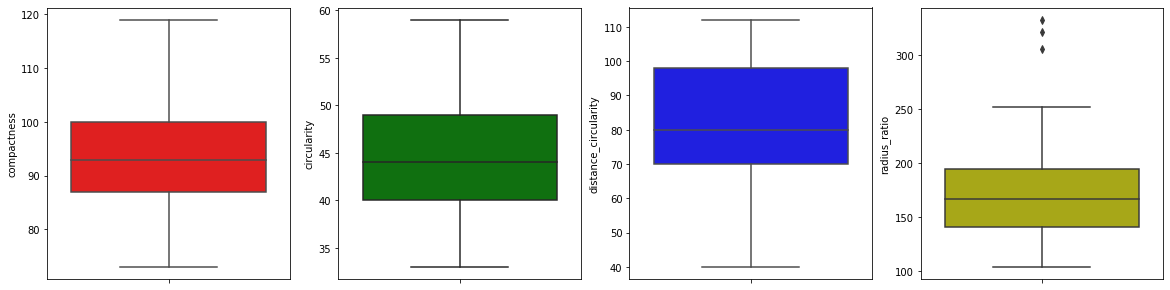

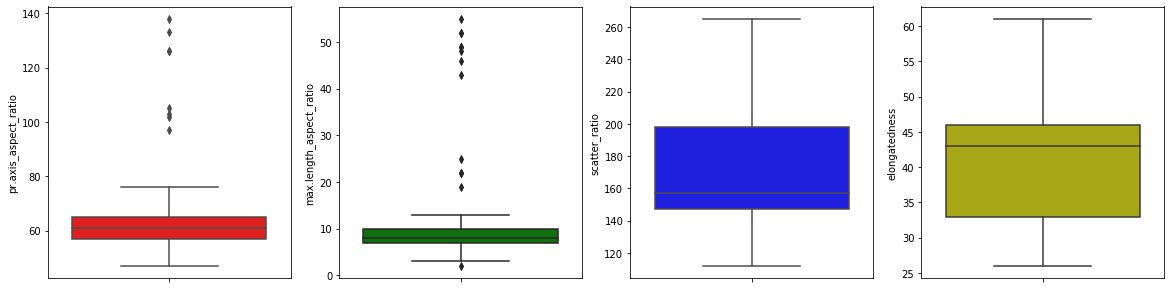

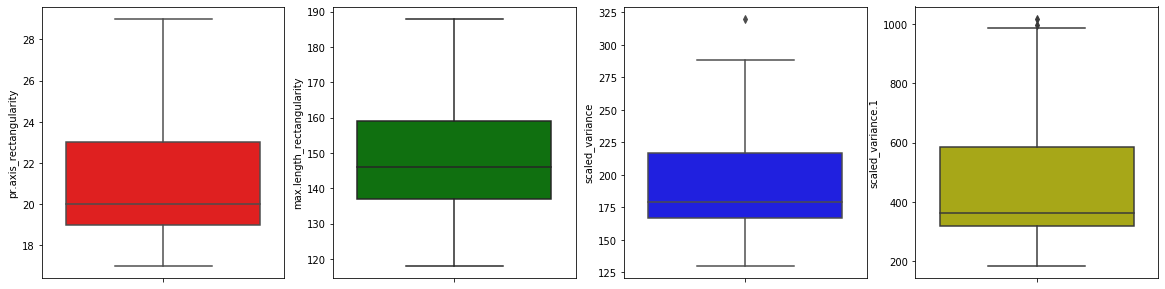

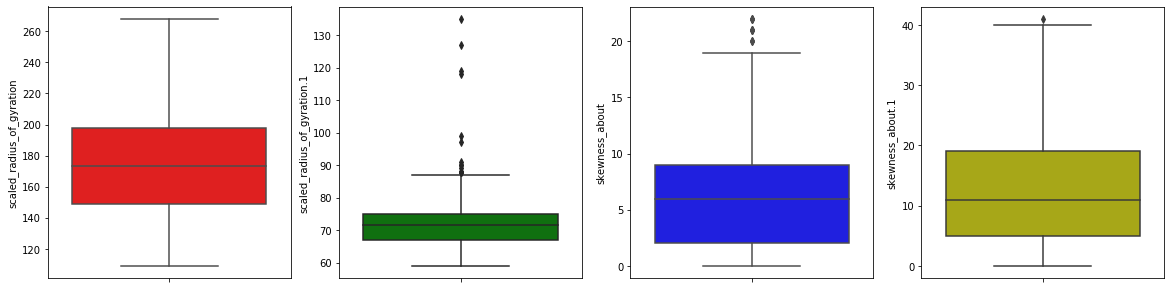

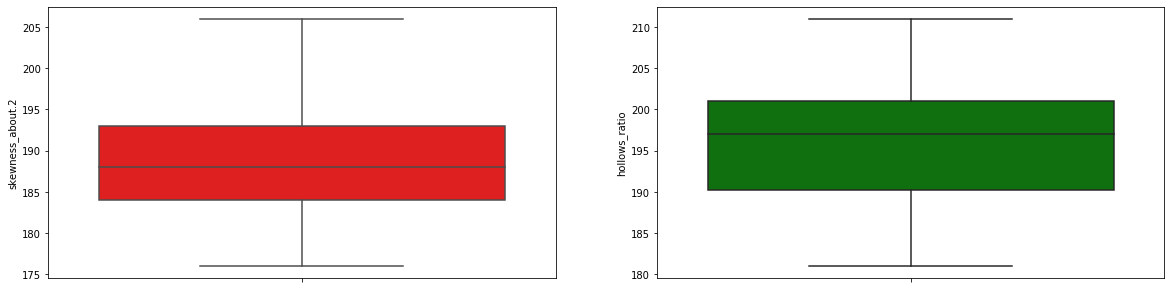

In [19]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
plt1=sns.boxplot(data = vehicle_df,x='compactness', orient = 'v' , ax = ax[0],color = 'r') 
plt2=sns.boxplot(data = vehicle_df,x='circularity', orient = 'v' , ax = ax[1],color = 'g') 
plt3=sns.boxplot(data = vehicle_df,x='distance_circularity', orient = 'v' , ax = ax[2],color = 'b') 
plt4=sns.boxplot(data = vehicle_df,x='radius_ratio', orient = 'v' , ax = ax[3],color ='y') 
#analyze the distribution of our columns
fig, ax = plt.subplots(1,4, figsize=(20,5))
plt1=sns.boxplot(data = vehicle_df,x='pr.axis_aspect_ratio', orient = 'v' , ax = ax[0],color = 'r') 
plt2=sns.boxplot(data = vehicle_df,x='max.length_aspect_ratio', orient = 'v' , ax = ax[1],color = 'g') 
plt3=sns.boxplot(data = vehicle_df,x='scatter_ratio', orient = 'v' , ax = ax[2],color = 'b') 
plt4=sns.boxplot(data = vehicle_df,x='elongatedness', orient = 'v' , ax = ax[3],color ='y') 

#analyze the distribution of our columns
fig, ax = plt.subplots(1,4, figsize=(20,5))
plt1=sns.boxplot(data = vehicle_df,x='pr.axis_rectangularity', orient = 'v' , ax = ax[0],color = 'r') 
plt2=sns.boxplot(data = vehicle_df,x='max.length_rectangularity', orient = 'v' , ax = ax[1],color = 'g') 
plt3=sns.boxplot(data = vehicle_df,x='scaled_variance', orient = 'v' , ax = ax[2],color = 'b') 
plt4=sns.boxplot(data = vehicle_df,x='scaled_variance.1', orient = 'v' , ax = ax[3],color ='y') 

#analyze the distribution of our columns
fig, ax = plt.subplots(1,4, figsize=(20,5))
plt1=sns.boxplot(data = vehicle_df,x='scaled_radius_of_gyration', orient = 'v' , ax = ax[0],color = 'r') 
plt2=sns.boxplot(data = vehicle_df,x='scaled_radius_of_gyration.1', orient = 'v' , ax = ax[1],color = 'g') 
plt3=sns.boxplot(data = vehicle_df,x='skewness_about', orient = 'v' , ax = ax[2],color = 'b') 
plt4=sns.boxplot(data = vehicle_df,x='skewness_about.1', orient = 'v' , ax = ax[3],color ='y') 

#analyze the distribution of our columns
fig, ax = plt.subplots(1,2, figsize=(20,5))
plt1=sns.boxplot(data = vehicle_df,x='skewness_about.2', orient = 'v' , ax = ax[0],color = 'r') 
plt2=sns.boxplot(data = vehicle_df,x='hollows_ratio', orient = 'v' , ax = ax[1],color = 'g') 


We see that several features are having few outliers. 
'radius_ratio'
'pr.axis_aspect_ratio'
'max.length_aspect_ratio'
'scaled_variance'
'scaled_variance.1'
'scaled_radius_of_gyration.1'
'skewness_about'
skewness_about.1.
Let us individually perform some outlier analysis

In [20]:
#radius_ratio
q1 = np.quantile(vehicle_df['radius_ratio'], 0.25)
q2 = np.quantile(vehicle_df['radius_ratio'], 0.50)
q3 = np.quantile(vehicle_df['radius_ratio'], 0.75)
IQR = q3 - q1
q4 = vehicle_df['radius_ratio'].quantile(0.75) + (1.5*IQR)
print("radius_ratio above ", q4, "are outliers")
print("No. of outliers ", vehicle_df[vehicle_df['radius_ratio'] > q4]['radius_ratio'].shape[0])
vehicle_df[vehicle_df['radius_ratio'] > q4]

radius_ratio above  276.0 are outliers
No. of outliers  3


compactness  circularity  distance_circularity  radius_ratio  \
37            90         48.0                  86.0         306.0   
135           89         47.0                  83.0         322.0   
388           94         47.0                  85.0         333.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
37                  126.0                       49          153.0   
135                 133.0                       48          158.0   
388                 138.0                       49          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
37            44.0                    19.0                        156   
135           43.0                    20.0                        163   
388           43.0                    19.0                        155   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
37             272.0              346.0                      200.0   
135            229.0              364.0                      176.0   
388            320.0              354.0                      187.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
37                         118.0             0.0              15.0   
135                         97.0             0.0              14.0   
388                        135.0            12.0               9.0   

     skewness_about.2  hollows_ratio class  
37              185.0            194   van  
135             184.0            194   van  
388             188.0            196   van

In [21]:
#applying log transform to see if outlier is diminishing 
vehicle_df['radius_ratio'] = np.log(vehicle_df['radius_ratio'])

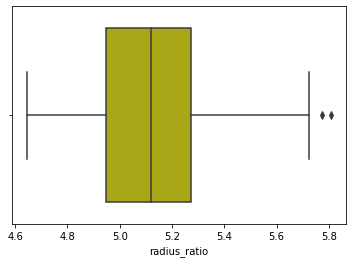

In [22]:
sns.boxplot(data = vehicle_df,x='radius_ratio', orient = 'h' ,color ='y') 
plt.show()

In [23]:
#we still see outliers and hence we can further check and update those outliers to the q3+(1.5*IQR) value
#radius_ratio
q1 = np.quantile(vehicle_df['radius_ratio'], 0.25)
q2 = np.quantile(vehicle_df['radius_ratio'], 0.50)
q3 = np.quantile(vehicle_df['radius_ratio'], 0.75)
IQR = q3 - q1
q4 = vehicle_df['radius_ratio'].quantile(0.75) + (1.5*IQR)
print("radius_ratio above ", q4, "are outliers")
print("No. of outliers ", vehicle_df[vehicle_df['radius_ratio'] > q4]['radius_ratio'].shape[0])
vehicle_df[vehicle_df['radius_ratio'] > q4]

radius_ratio above  5.759359060842114 are outliers
No. of outliers  2


compactness  circularity  distance_circularity  radius_ratio  \
135           89         47.0                  83.0      5.774552   
388           94         47.0                  85.0      5.808142   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
135                 133.0                       48          158.0   
388                 138.0                       49          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
135           43.0                    20.0                        163   
388           43.0                    19.0                        155   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
135            229.0              364.0                      176.0   
388            320.0              354.0                      187.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
135                         97.0             0.0              14.0   
388                        135.0            12.0               9.0   

     skewness_about.2  hollows_ratio class  
135             184.0            194   van  
388             188.0            196   van

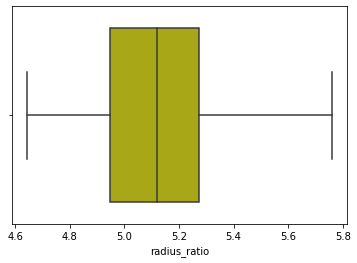

In [24]:
#Let us update the radius ratio to Q3+(1.5*IQR) for the outliers
a = np.array(vehicle_df['radius_ratio'].values.tolist())
vehicle_df['radius_ratio'] = np.where(a > q4, q3+(1.5*IQR), a).tolist()
sns.boxplot(data = vehicle_df,x='radius_ratio', orient = 'h' ,color ='y') 
plt.show()

radius_ratio outliers has been cleared

In [25]:
#pr.axis_aspect_ratio
q1 = np.quantile(vehicle_df['pr.axis_aspect_ratio'], 0.25)
q2 = np.quantile(vehicle_df['pr.axis_aspect_ratio'], 0.50)
q3 = np.quantile(vehicle_df['pr.axis_aspect_ratio'], 0.75)
IQR = q3 - q1
q4 = vehicle_df['pr.axis_aspect_ratio'].quantile(0.75) + (1.5*IQR)
print("pr.axis_aspect_ratio above ", q4, "are outliers")
print("No. of outliers ", vehicle_df[vehicle_df['pr.axis_aspect_ratio'] > q4]['pr.axis_aspect_ratio'].shape[0])
vehicle_df[vehicle_df['pr.axis_aspect_ratio'] > q4]

pr.axis_aspect_ratio above  77.0 are outliers
No. of outliers  8


compactness  circularity  distance_circularity  radius_ratio  \
4             85         44.0                  70.0      5.323010   
37            90         48.0                  86.0      5.723585   
100           82         45.0                  66.0      5.529429   
135           89         47.0                  83.0      5.759359   
291           89         45.0                  81.0      5.505332   
388           94         47.0                  85.0      5.759359   
523           90         43.0                  81.0      5.442418   
706           82         43.0                  70.0      5.521461   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                   103.0                       52          149.0   
37                  126.0                       49          153.0   
100                 126.0                       52          148.0   
135                 133.0                       48          158.0   
291                 102.0                       43          155.0   
388                 138.0                       49          155.0   
523                  97.0                       46          150.0   
706                 105.0                       55          139.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                        144   
37            44.0                    19.0                        156   
100           45.0                    19.0                        144   
135           43.0                    20.0                        163   
291           44.0                    20.0                        160   
388           43.0                    19.0                        155   
523           45.0                    19.0                        149   
706           48.0                    18.0                        145   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
37             272.0              346.0                      200.0   
100            237.0              326.0                      185.0   
135            229.0              364.0                      176.0   
291            200.0              347.0                      177.0   
388            320.0              354.0                      187.0   
523            200.0              332.0                      164.0   
706            231.0              289.0                      172.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                          127.0             9.0              11.0   
37                         118.0             0.0              15.0   
100                        119.0             1.0               1.0   
135                         97.0             0.0              14.0   
291                         90.0             9.0              17.0   
388                        135.0            12.0               9.0   
523                         91.0             5.0               9.0   
706                         99.0             4.0               9.0   

     skewness_about.2  hollows_ratio class  
4               180.0            183   bus  
37              185.0            194   van  
100             181.0            185   bus  
135             184.0            194   van  
291             183.0            192   van  
388             188.0            196   van  
523             186.0            196   van  
706             190.0            199   van

In [26]:
#applying log transform to see if outlier is diminishing 
vehicle_df['pr.axis_aspect_ratio'] = np.log(vehicle_df['pr.axis_aspect_ratio'])

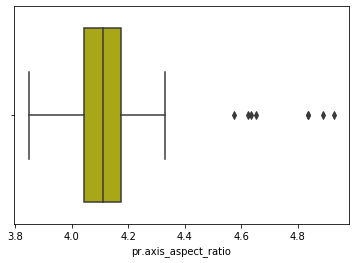

In [27]:
sns.boxplot(data = vehicle_df,x='pr.axis_aspect_ratio', orient = 'h' ,color ='y') 
plt.show()

In [28]:
#pr.axis_aspect_ratio
q1 = np.quantile(vehicle_df['pr.axis_aspect_ratio'], 0.25)
q2 = np.quantile(vehicle_df['pr.axis_aspect_ratio'], 0.50)
q3 = np.quantile(vehicle_df['pr.axis_aspect_ratio'], 0.75)
IQR = q3 - q1
q4 = vehicle_df['pr.axis_aspect_ratio'].quantile(0.75) + (1.5*IQR)
print("pr.axis_aspect_ratio above ", q4, "are outliers")
print("No. of outliers ", vehicle_df[vehicle_df['pr.axis_aspect_ratio'] > q4]['pr.axis_aspect_ratio'].shape[0])
vehicle_df[vehicle_df['pr.axis_aspect_ratio'] > q4]

pr.axis_aspect_ratio above  4.371391272987267 are outliers
No. of outliers  8


compactness  circularity  distance_circularity  radius_ratio  \
4             85         44.0                  70.0      5.323010   
37            90         48.0                  86.0      5.723585   
100           82         45.0                  66.0      5.529429   
135           89         47.0                  83.0      5.759359   
291           89         45.0                  81.0      5.505332   
388           94         47.0                  85.0      5.759359   
523           90         43.0                  81.0      5.442418   
706           82         43.0                  70.0      5.521461   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                4.634729                       52          149.0   
37               4.836282                       49          153.0   
100              4.836282                       52          148.0   
135              4.890349                       48          158.0   
291              4.624973                       43          155.0   
388              4.927254                       49          155.0   
523              4.574711                       46          150.0   
706              4.653960                       55          139.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                        144   
37            44.0                    19.0                        156   
100           45.0                    19.0                        144   
135           43.0                    20.0                        163   
291           44.0                    20.0                        160   
388           43.0                    19.0                        155   
523           45.0                    19.0                        149   
706           48.0                    18.0                        145   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
37             272.0              346.0                      200.0   
100            237.0              326.0                      185.0   
135            229.0              364.0                      176.0   
291            200.0              347.0                      177.0   
388            320.0              354.0                      187.0   
523            200.0              332.0                      164.0   
706            231.0              289.0                      172.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                          127.0             9.0              11.0   
37                         118.0             0.0              15.0   
100                        119.0             1.0               1.0   
135                         97.0             0.0              14.0   
291                         90.0             9.0              17.0   
388                        135.0            12.0               9.0   
523                         91.0             5.0               9.0   
706                         99.0             4.0               9.0   

     skewness_about.2  hollows_ratio class  
4               180.0            183   bus  
37              185.0            194   van  
100             181.0            185   bus  
135             184.0            194   van  
291             183.0            192   van  
388             188.0            196   van  
523             186.0            196   van  
706             190.0            199   van

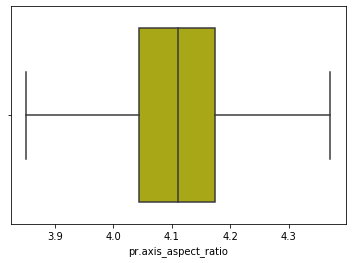

In [29]:
#Let us update the radius ratio to Q3+(1.5*IQR) for the outliers
a = np.array(vehicle_df['pr.axis_aspect_ratio'].values.tolist())
vehicle_df['pr.axis_aspect_ratio'] = np.where(a > q4, q3+(1.5*IQR), a).tolist()
sns.boxplot(data = vehicle_df,x='pr.axis_aspect_ratio', orient = 'h' ,color ='y') 
plt.show()

pr.axis_aspect_ratio outliers has been cleared

In [30]:
#max.length_aspect_ratio
q1 = np.quantile(vehicle_df['max.length_aspect_ratio'], 0.25)
q2 = np.quantile(vehicle_df['max.length_aspect_ratio'], 0.50)
q3 = np.quantile(vehicle_df['max.length_aspect_ratio'], 0.75)
IQR = q3 - q1
q4 = vehicle_df['max.length_aspect_ratio'].quantile(0.75) + (1.5*IQR)
print("max.length_aspect_ratio above ", q4, "are outliers")
print("No. of outliers ", vehicle_df[vehicle_df['max.length_aspect_ratio'] > q4]['max.length_aspect_ratio'].shape[0])
vehicle_df[vehicle_df['max.length_aspect_ratio'] > q4]

max.length_aspect_ratio above  14.5 are outliers
No. of outliers  12


compactness  circularity  distance_circularity  radius_ratio  \
4             85         44.0                  70.0      5.323010   
37            90         48.0                  86.0      5.723585   
100           82         45.0                  66.0      5.529429   
127           85         41.0                  66.0      5.043425   
135           89         47.0                  83.0      5.759359   
291           89         45.0                  81.0      5.505332   
388           94         47.0                  85.0      5.759359   
391           91         38.0                  70.0      5.075174   
523           90         43.0                  81.0      5.442418   
544           88         43.0                  70.0      5.176150   
706           82         43.0                  70.0      5.521461   
815           81         45.0                  68.0      5.036953   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                4.371391                       52          149.0   
37               4.371391                       49          153.0   
100              4.371391                       52          148.0   
127              4.174387                       22          149.0   
135              4.371391                       48          158.0   
291              4.371391                       43          155.0   
388              4.371391                       49          155.0   
391              4.189655                       25          140.0   
523              4.371391                       46          150.0   
544              4.304065                       19          152.0   
706              4.371391                       55          139.0   
815              4.234107                       22          151.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                        144   
37            44.0                    19.0                        156   
100           45.0                    19.0                        144   
127           45.0                    19.0                        139   
135           43.0                    20.0                        163   
291           44.0                    20.0                        160   
388           43.0                    19.0                        155   
391           47.0                    18.0                        139   
523           45.0                    19.0                        149   
544           44.0                    19.0                        143   
706           48.0                    18.0                        145   
815           45.0                    19.0                        147   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
37             272.0              346.0                      200.0   
100            237.0              326.0                      185.0   
127            173.0              330.0                      155.0   
135            229.0              364.0                      176.0   
291            200.0              347.0                      177.0   
388            320.0              354.0                      187.0   
391            162.0              296.0                      130.0   
523            200.0              332.0                      164.0   
544            180.0              342.0                      168.0   
706            231.0              289.0                      172.0   
815            186.0              335.0                      186.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                          127.0             9.0              11.0   
37                         118.0             0.0              15.0   
100                        119.0             1.0               1.0   
127                         75.0             6.0              16.0  

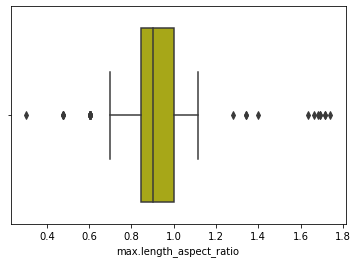

In [31]:
#applying log transform to see if outlier is diminishing 
vehicle_df['max.length_aspect_ratio'] = np.log10(vehicle_df['max.length_aspect_ratio'])
sns.boxplot(data = vehicle_df,x='max.length_aspect_ratio', orient = 'h' ,color ='y') 
plt.show()

In [32]:
#max.length_aspect_ratio
q1 = np.quantile(vehicle_df['max.length_aspect_ratio'], 0.25)
q2 = np.quantile(vehicle_df['max.length_aspect_ratio'], 0.50)
q3 = np.quantile(vehicle_df['max.length_aspect_ratio'], 0.75)
IQR = q3 - q1
q4 = vehicle_df['max.length_aspect_ratio'].quantile(0.75) + (1.5*IQR)
q5 = vehicle_df['max.length_aspect_ratio'].quantile(0.25) - (1.5*IQR)
print("max.length_aspect_ratio below ", q5, "are outliers")
print("max.length_aspect_ratio above ", q4, "are outliers")
print("No. of outliers ", vehicle_df[(vehicle_df['max.length_aspect_ratio'] > q4) | (vehicle_df['max.length_aspect_ratio'] < q5)]['max.length_aspect_ratio'].shape[0])
vehicle_df[(vehicle_df['max.length_aspect_ratio'] > q4) | (vehicle_df['max.length_aspect_ratio'] < q5)]

max.length_aspect_ratio below  0.6127451000356421 are outliers
max.length_aspect_ratio above  1.2323529399786148 are outliers
No. of outliers  35


compactness  circularity  distance_circularity  radius_ratio  \
4             85         44.0                  70.0      5.323010   
37            90         48.0                  86.0      5.723585   
100           82         45.0                  66.0      5.529429   
127           85         41.0                  66.0      5.043425   
135           89         47.0                  83.0      5.759359   
171          106         54.0                 103.0      5.081404   
183           84         35.0                  53.0      4.804021   
213          104         49.0                  89.0      5.123964   
230           85         35.0                  47.0      4.700480   
231           85         33.0                  40.0      4.744932   
260           83         37.0                  54.0      4.770685   
291           89         45.0                  81.0      5.505332   
342           83         37.0                  54.0      4.875197   
374           87         36.0                  53.0      4.762174   
375          109         52.0                  95.0      5.241747   
381          106         54.0                 100.0      5.424950   
388           94         47.0                  85.0      5.759359   
391           91         38.0                  70.0      5.075174   
411           78         36.0                  51.0      4.753590   
444          102         53.0                 101.0      5.472271   
463           85         40.0                  66.0      4.795791   
472          105         50.0                  93.0      5.153292   
498           88         36.0                  53.0      4.727388   
523           90         43.0                  81.0      5.442418   
544           88         43.0                  70.0      5.176150   
550           86         38.0                  58.0      4.779123   
557           86         40.0                  66.0      4.927254   
612           80         34.0                  42.0      4.700480   
614           85         33.0                  50.0      4.644391   
655           86         35.0                  44.0      4.700480   
688           89         35.0                  52.0      4.795791   
706           82         43.0                  70.0      5.521461   
777          106         53.0                  98.0      5.036953   
815           81         45.0                  68.0      5.036953   
834           82         36.0                  51.0      4.736198   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                4.371391                 1.716003          149.0   
37               4.371391                 1.690196          153.0   
100              4.371391                 1.716003          148.0   
127              4.174387                 1.342423          149.0   
135              4.371391                 1.681241          158.0   
171              3.850148                 0.602060          247.0   
183              4.043051                 0.602060          116.0   
213              3.988984                 0.602060          212.0   
230              4.007333                 0.477121          117.0   
231              4.043051                 0.477121          112.0   
260              4.007333                 0.602060          129.0   
291              4.371391                 1.633468          155.0   
342              4.110874                 0.602060          135.0   
374              4.060443                 0.602060          118.0   
375              4.060443                 0.602060          227.0   
381              4.204693                 0.602060          250.0   
388              4.371391                 1.690196          155.0   
391              4.189655                 1.397940          140.0   
411              4.025352                 0.602060          120.0   
444              4.276666                 0.602060          238.0   
463              3.951244                 0.602060          152.0   
47

Outliers have increased after log transformation. Hence we will reverse the log transformation back and then apply q3+(1.5*IQR) value for the outliers

In [33]:
vehicle_df['max.length_aspect_ratio'] = 10**vehicle_df['max.length_aspect_ratio']

In [34]:
#max.length_aspect_ratio
q1 = np.quantile(vehicle_df['max.length_aspect_ratio'], 0.25)
q2 = np.quantile(vehicle_df['max.length_aspect_ratio'], 0.50)
q3 = np.quantile(vehicle_df['max.length_aspect_ratio'], 0.75)
IQR = q3 - q1
q4 = vehicle_df['max.length_aspect_ratio'].quantile(0.75) + (1.5*IQR)
print("max.length_aspect_ratio above ", q4, "are outliers")
print("No. of outliers ", vehicle_df[vehicle_df['max.length_aspect_ratio'] > q4]['max.length_aspect_ratio'].shape[0])
vehicle_df[vehicle_df['max.length_aspect_ratio'] > q4]

max.length_aspect_ratio above  14.5 are outliers
No. of outliers  12


compactness  circularity  distance_circularity  radius_ratio  \
4             85         44.0                  70.0      5.323010   
37            90         48.0                  86.0      5.723585   
100           82         45.0                  66.0      5.529429   
127           85         41.0                  66.0      5.043425   
135           89         47.0                  83.0      5.759359   
291           89         45.0                  81.0      5.505332   
388           94         47.0                  85.0      5.759359   
391           91         38.0                  70.0      5.075174   
523           90         43.0                  81.0      5.442418   
544           88         43.0                  70.0      5.176150   
706           82         43.0                  70.0      5.521461   
815           81         45.0                  68.0      5.036953   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                4.371391                     52.0          149.0   
37               4.371391                     49.0          153.0   
100              4.371391                     52.0          148.0   
127              4.174387                     22.0          149.0   
135              4.371391                     48.0          158.0   
291              4.371391                     43.0          155.0   
388              4.371391                     49.0          155.0   
391              4.189655                     25.0          140.0   
523              4.371391                     46.0          150.0   
544              4.304065                     19.0          152.0   
706              4.371391                     55.0          139.0   
815              4.234107                     22.0          151.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                        144   
37            44.0                    19.0                        156   
100           45.0                    19.0                        144   
127           45.0                    19.0                        139   
135           43.0                    20.0                        163   
291           44.0                    20.0                        160   
388           43.0                    19.0                        155   
391           47.0                    18.0                        139   
523           45.0                    19.0                        149   
544           44.0                    19.0                        143   
706           48.0                    18.0                        145   
815           45.0                    19.0                        147   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
37             272.0              346.0                      200.0   
100            237.0              326.0                      185.0   
127            173.0              330.0                      155.0   
135            229.0              364.0                      176.0   
291            200.0              347.0                      177.0   
388            320.0              354.0                      187.0   
391            162.0              296.0                      130.0   
523            200.0              332.0                      164.0   
544            180.0              342.0                      168.0   
706            231.0              289.0                      172.0   
815            186.0              335.0                      186.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                          127.0             9.0              11.0   
37                         118.0             0.0              15.0   
100                        119.0             1.0               1.0   
127                         75.0             6.0              16.0  

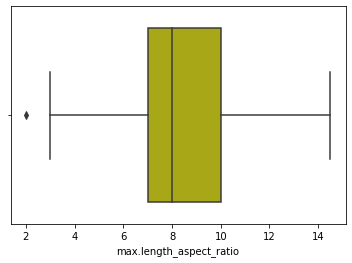

In [35]:
#Let us update the max.length_aspect_ratio to Q3+(1.5*IQR) for the outliers
a = np.array(vehicle_df['max.length_aspect_ratio'].values.tolist())
vehicle_df['max.length_aspect_ratio'] = np.where(a > q4, q3+(1.5*IQR), a).tolist()
sns.boxplot(data = vehicle_df,x='max.length_aspect_ratio', orient = 'h' ,color ='y') 
plt.show()

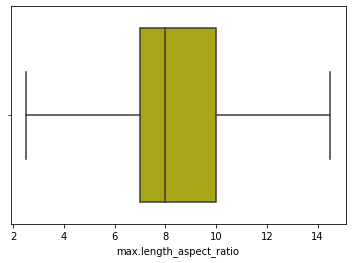

In [36]:
#some outlier below, lets update them as well to (0.25) - (1.5*IQR)
q1 = np.quantile(vehicle_df['max.length_aspect_ratio'], 0.25)
q2 = np.quantile(vehicle_df['max.length_aspect_ratio'], 0.50)
q3 = np.quantile(vehicle_df['max.length_aspect_ratio'], 0.75)
IQR = q3 - q1
q4 = vehicle_df['max.length_aspect_ratio'].quantile(0.75) + (1.5*IQR)
q5 = vehicle_df['max.length_aspect_ratio'].quantile(0.25) - (1.5*IQR)
a = np.array(vehicle_df['max.length_aspect_ratio'].values.tolist())
vehicle_df['max.length_aspect_ratio'] = np.where(a < q5, q1-(1.5*IQR), a).tolist()
sns.boxplot(data = vehicle_df,x='max.length_aspect_ratio', orient = 'h' ,color ='y') 
plt.show()

Outliers for max.length_aspect_ratio has been cleared

In [37]:
#scaled_variance
q1 = np.quantile(vehicle_df['scaled_variance'], 0.25)
q2 = np.quantile(vehicle_df['scaled_variance'], 0.50)
q3 = np.quantile(vehicle_df['scaled_variance'], 0.75)
IQR = q3 - q1
q4 = vehicle_df['scaled_variance'].quantile(0.75) + (1.5*IQR)
print("scaled_variance above ", q4, "are outliers")
print("scaled_variance ", vehicle_df[vehicle_df['scaled_variance'] > q4]['scaled_variance'].shape[0])
vehicle_df[vehicle_df['scaled_variance'] > q4]

scaled_variance above  292.0 are outliers
scaled_variance  1


compactness  circularity  distance_circularity  radius_ratio  \
388           94         47.0                  85.0      5.759359   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
388              4.371391                     14.5          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
388           43.0                    19.0                        155   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
388            320.0              354.0                      187.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
388                        135.0            12.0               9.0   

     skewness_about.2  hollows_ratio class  
388             188.0            196   van

In [38]:
#applying log transform to see if outlier is diminishing 
vehicle_df['scaled_variance'] = np.log(vehicle_df['scaled_variance'])

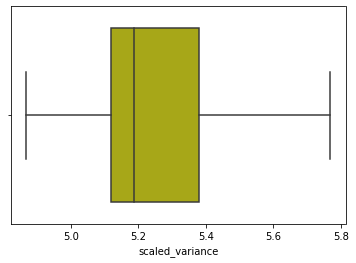

In [39]:
sns.boxplot(data = vehicle_df,x='scaled_variance', orient = 'h' ,color ='y') 
plt.show()

Outlier has been cleared for scaled_variance

In [40]:
#scaled_variance.1
q1 = np.quantile(vehicle_df['scaled_variance.1'], 0.25)
q2 = np.quantile(vehicle_df['scaled_variance.1'], 0.50)
q3 = np.quantile(vehicle_df['scaled_variance.1'], 0.75)
IQR = q3 - q1
q4 = vehicle_df['scaled_variance.1'].quantile(0.75) + (1.5*IQR)
print("scaled_variance.1 above ", q4, "are outliers")
print("scaled_variance.1 ", vehicle_df[vehicle_df['scaled_variance.1'] > q4]['scaled_variance.1'].shape[0])
vehicle_df[vehicle_df['scaled_variance.1'] > q4]

scaled_variance.1 above  989.5 are outliers
scaled_variance.1  2


compactness  circularity  distance_circularity  radius_ratio  \
85           110         58.0                 106.0      5.192957   
835          111         58.0                 105.0      5.209486   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
85               3.931826                      6.0          261.0   
835              3.931826                      6.0          265.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
85            26.0                    28.0                        171   
835           26.0                    29.0                        174   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
85          5.627621              998.0                      257.0   
835         5.652489             1018.0                      255.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
85                          83.0             9.0              13.0   
835                         85.0             4.0               8.0   

     skewness_about.2  hollows_ratio class  
85              181.0            182   bus  
835             181.0            183   bus

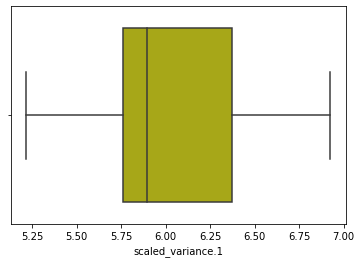

In [41]:
#applying log transform
vehicle_df['scaled_variance.1'] = np.log(vehicle_df['scaled_variance.1'])
sns.boxplot(data = vehicle_df,x='scaled_variance.1', orient = 'h' ,color ='y') 
plt.show()

Outlier has been cleared for scaled_variance.1

In [42]:
#scaled_radius_of_gyration.1
q1 = np.quantile(vehicle_df['scaled_radius_of_gyration.1'], 0.25)
q2 = np.quantile(vehicle_df['scaled_radius_of_gyration.1'], 0.50)
q3 = np.quantile(vehicle_df['scaled_radius_of_gyration.1'], 0.75)
IQR = q3 - q1
q4 = vehicle_df['scaled_radius_of_gyration.1'].quantile(0.75) + (1.5*IQR)
print("scaled_radius_of_gyration.1 above ", q4, "are outliers")
print("scaled_radius_of_gyration.1 ", vehicle_df[vehicle_df['scaled_radius_of_gyration.1'] > q4]['scaled_radius_of_gyration.1'].shape[0])
vehicle_df[vehicle_df['scaled_radius_of_gyration.1'] > q4]

scaled_radius_of_gyration.1 above  87.0 are outliers
scaled_radius_of_gyration.1  15


compactness  circularity  distance_circularity  radius_ratio  \
4             85         44.0                  70.0      5.323010   
37            90         48.0                  86.0      5.723585   
47            85         42.0                  66.0      4.804021   
79            89         44.0                  68.0      4.727388   
100           82         45.0                  66.0      5.529429   
135           89         47.0                  83.0      5.759359   
230           85         35.0                  47.0      4.700480   
291           89         45.0                  81.0      5.505332   
381          106         54.0                 100.0      5.424950   
388           94         47.0                  85.0      5.759359   
498           88         36.0                  53.0      4.727388   
523           90         43.0                  81.0      5.442418   
655           86         35.0                  44.0      4.700480   
706           82         43.0                  70.0      5.521461   
815           81         45.0                  68.0      5.036953   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                4.371391                     14.5          149.0   
37               4.371391                     14.5          153.0   
47               3.988984                      6.0          148.0   
79               3.912023                      7.0          150.0   
100              4.371391                     14.5          148.0   
135              4.371391                     14.5          158.0   
230              4.007333                      3.0          117.0   
291              4.371391                     14.5          155.0   
381              4.204693                      4.0          250.0   
388              4.371391                     14.5          155.0   
498              4.043051                      3.0          118.0   
523              4.371391                     14.5          150.0   
655              3.988984                      2.5          119.0   
706              4.371391                     14.5          139.0   
815              4.234107                     14.5          151.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                        144   
37            44.0                    19.0                        156   
47            46.0                    19.0                        141   
79            45.0                    19.0                        147   
100           45.0                    19.0                        144   
135           43.0                    20.0                        163   
230           57.0                    17.0                        122   
291           44.0                    20.0                        160   
381           27.0                    27.0                        162   
388           43.0                    19.0                        155   
498           57.0                    17.0                        128   
523           45.0                    19.0                        149   
655           57.0                    17.0                        121   
706           48.0                    18.0                        145   
815           45.0                    19.0                        147   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4           5.484797           5.783825                      188.0   
37          5.605802           5.846439                      200.0   
47          5.147494           5.758902                      174.0   
79          5.141664           5.793014                      189.0   
100         5.468060           5.786897                      185.0   
135         5.433722           5.897154                      176.0   
230         4.912655           5.313206                      139.0   
291         5.298317           5.849325                      177.0

In [43]:
#lets apply log transform
vehicle_df['scaled_radius_of_gyration.1'] = np.log(vehicle_df['scaled_radius_of_gyration.1'])


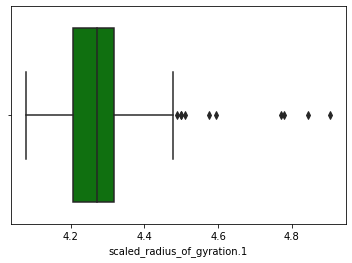

In [44]:
sns.boxplot(data = vehicle_df,x='scaled_radius_of_gyration.1', orient = 'h',color = 'g') 
plt.show()

In [45]:
#scaled_radius_of_gyration.1
q1 = np.quantile(vehicle_df['scaled_radius_of_gyration.1'], 0.25)
q2 = np.quantile(vehicle_df['scaled_radius_of_gyration.1'], 0.50)
q3 = np.quantile(vehicle_df['scaled_radius_of_gyration.1'], 0.75)
IQR = q3 - q1
q4 = vehicle_df['scaled_radius_of_gyration.1'].quantile(0.75) + (1.5*IQR)
print("scaled_radius_of_gyration.1 above ", q4, "are outliers")
print("scaled_radius_of_gyration.1 ", vehicle_df[vehicle_df['scaled_radius_of_gyration.1'] > q4]['scaled_radius_of_gyration.1'].shape[0])
vehicle_df[vehicle_df['scaled_radius_of_gyration.1'] > q4]

scaled_radius_of_gyration.1 above  4.486681354754326 are outliers
scaled_radius_of_gyration.1  10


compactness  circularity  distance_circularity  radius_ratio  \
4             85         44.0                  70.0      5.323010   
37            90         48.0                  86.0      5.723585   
100           82         45.0                  66.0      5.529429   
135           89         47.0                  83.0      5.759359   
230           85         35.0                  47.0      4.700480   
291           89         45.0                  81.0      5.505332   
388           94         47.0                  85.0      5.759359   
523           90         43.0                  81.0      5.442418   
655           86         35.0                  44.0      4.700480   
706           82         43.0                  70.0      5.521461   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                4.371391                     14.5          149.0   
37               4.371391                     14.5          153.0   
100              4.371391                     14.5          148.0   
135              4.371391                     14.5          158.0   
230              4.007333                      3.0          117.0   
291              4.371391                     14.5          155.0   
388              4.371391                     14.5          155.0   
523              4.371391                     14.5          150.0   
655              3.988984                      2.5          119.0   
706              4.371391                     14.5          139.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                        144   
37            44.0                    19.0                        156   
100           45.0                    19.0                        144   
135           43.0                    20.0                        163   
230           57.0                    17.0                        122   
291           44.0                    20.0                        160   
388           43.0                    19.0                        155   
523           45.0                    19.0                        149   
655           57.0                    17.0                        121   
706           48.0                    18.0                        145   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4           5.484797           5.783825                      188.0   
37          5.605802           5.846439                      200.0   
100         5.468060           5.786897                      185.0   
135         5.433722           5.897154                      176.0   
230         4.912655           5.313206                      139.0   
291         5.298317           5.849325                      177.0   
388         5.768321           5.869297                      187.0   
523         5.298317           5.805135                      164.0   
655         4.934474           5.337538                      137.0   
706         5.442418           5.666427                      172.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                       4.844187             9.0              11.0   
37                      4.770685             0.0              15.0   
100                     4.779123             1.0               1.0   
135                     4.574711             0.0              14.0   
230                     4.488636             5.0               9.0   
291                     4.499810             9.0              17.0   
388                     4.905275            12.0               9.0   
523                     4.510860             5.0               9.0   
655                     4.499810             6.0               1.0   
706                     4.595120             4.0               9.0   

     skewness_about.2  hollows_ratio class  
4               180.0            183   bus  
37              185.0            194   van  
100 

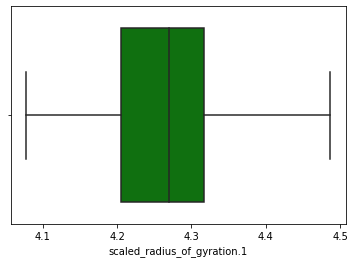

In [46]:
#Let us update the radius ratio to Q3+(1.5*IQR) for the outliers
a = np.array(vehicle_df['scaled_radius_of_gyration.1'].values.tolist())
vehicle_df['scaled_radius_of_gyration.1'] = np.where(a > q4, q3+(1.5*IQR), a).tolist()
sns.boxplot(data = vehicle_df,x='scaled_radius_of_gyration.1', orient = 'h' ,color ='g') 
plt.show()

Outlier for scaled_radius_of_gyration.1 has been cleared

In [47]:
#skewness_about
q1 = np.quantile(vehicle_df['skewness_about'], 0.25)
q2 = np.quantile(vehicle_df['skewness_about'], 0.50)
q3 = np.quantile(vehicle_df['skewness_about'], 0.75)
IQR = q3 - q1
q4 = vehicle_df['skewness_about'].quantile(0.75) + (1.5*IQR)
print("skewness_about above ", q4, "are outliers")
print("skewness_about ", vehicle_df[vehicle_df['skewness_about'] > q4]['skewness_about'].shape[0])
vehicle_df[vehicle_df['skewness_about'] > q4]

skewness_about above  19.5 are outliers
skewness_about  12


compactness  circularity  distance_circularity  radius_ratio  \
44           119         54.0                 106.0      5.393628   
113           88         35.0                  50.0      4.795791   
123           90         36.0                  57.0      4.867534   
190           97         48.0                  94.0      5.288267   
346          117         52.0                 110.0      5.429346   
400          107         53.0                 108.0      5.361292   
505          115         53.0                 100.0      5.323010   
516           92         42.0                  75.0      5.147494   
623          106         52.0                 108.0      5.332719   
761          115         51.0                 100.0      5.303305   
796           85         38.0                  63.0      4.867534   
797          111         53.0                 108.0      5.351858   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
44               4.174387                     12.0          213.0   
113              4.060443                      5.0          114.0   
123              4.043051                      6.0          121.0   
190              4.143135                      9.0          181.0   
346              4.174387                     12.0          212.0   
400              4.158883                     12.0          206.0   
505              4.158883                     11.0          220.0   
516              4.094345                      8.0          147.0   
623              4.158883                     12.0          221.0   
761              4.094345                     12.0          196.0   
796              4.007333                      7.0          122.0   
797              4.110874                     11.0          207.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
44            31.0                    24.0                        167   
113           59.0                    17.0                        122   
123           56.0                    17.0                        127   
190           36.0                    21.0                        155   
346           31.0                    24.0                        163   
400           32.0                    23.0                        163   
505           30.0                    25.0                        166   
516           45.0                    19.0                        142   
623           31.0                    25.0                        168   
761           34.0                    23.0                        162   
796           55.0                    17.0                        130   
797           32.0                    23.0                        167   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
44          5.407172           6.514713                      232.0   
113         4.882802           5.257495                      138.0   
123         4.919981           5.375278                      132.0   
190         5.298317           6.202536                      189.0   
346         5.429346           6.504288                      220.0   
400         5.375278           6.440947                      202.0   
505         5.433722           6.565265                      214.0   
516         5.159055           5.774552                      160.0   
623         5.433722           6.563856                      200.0   
761         5.332719           6.350886                      184.0   
796         4.919981           5.389072                      144.0   
797         5.379897           6.455199                      216.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
44                      4.189655            20.0               1.0   
113                     4.304065            21.0               4.0   
123                     4.219508            22.0              23.0   
190                     4.158883            20.0              11.0  

C:\Users\gsrin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


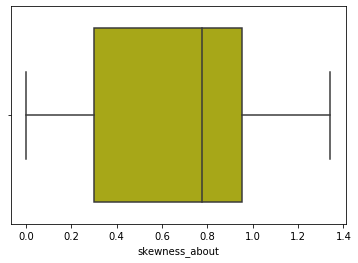

In [48]:
#apply log transform
vehicle_df['skewness_about'] = np.log10(vehicle_df['skewness_about'])
sns.boxplot(data = vehicle_df,x='skewness_about', orient = 'h',color = 'y') 
plt.show()

Since we have some 0 values, even though Outlier for skewness_about has been cleared we get a warning for log function. Hence we will reverse the log transformation back and then apply q3+(1.5*IQR) value for the outliers

In [49]:
vehicle_df['skewness_about'] = 10**vehicle_df['skewness_about']

In [50]:
#skewness_about
q1 = np.quantile(vehicle_df['skewness_about'], 0.25)
q2 = np.quantile(vehicle_df['skewness_about'], 0.50)
q3 = np.quantile(vehicle_df['skewness_about'], 0.75)
IQR = q3 - q1
q4 = vehicle_df['skewness_about'].quantile(0.75) + (1.5*IQR)
print("skewness_about above ", q4, "are outliers")
print("skewness_about ", vehicle_df[vehicle_df['skewness_about'] > q4]['skewness_about'].shape[0])
vehicle_df[vehicle_df['skewness_about'] > q4]

skewness_about above  19.5 are outliers
skewness_about  12


compactness  circularity  distance_circularity  radius_ratio  \
44           119         54.0                 106.0      5.393628   
113           88         35.0                  50.0      4.795791   
123           90         36.0                  57.0      4.867534   
190           97         48.0                  94.0      5.288267   
346          117         52.0                 110.0      5.429346   
400          107         53.0                 108.0      5.361292   
505          115         53.0                 100.0      5.323010   
516           92         42.0                  75.0      5.147494   
623          106         52.0                 108.0      5.332719   
761          115         51.0                 100.0      5.303305   
796           85         38.0                  63.0      4.867534   
797          111         53.0                 108.0      5.351858   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
44               4.174387                     12.0          213.0   
113              4.060443                      5.0          114.0   
123              4.043051                      6.0          121.0   
190              4.143135                      9.0          181.0   
346              4.174387                     12.0          212.0   
400              4.158883                     12.0          206.0   
505              4.158883                     11.0          220.0   
516              4.094345                      8.0          147.0   
623              4.158883                     12.0          221.0   
761              4.094345                     12.0          196.0   
796              4.007333                      7.0          122.0   
797              4.110874                     11.0          207.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
44            31.0                    24.0                        167   
113           59.0                    17.0                        122   
123           56.0                    17.0                        127   
190           36.0                    21.0                        155   
346           31.0                    24.0                        163   
400           32.0                    23.0                        163   
505           30.0                    25.0                        166   
516           45.0                    19.0                        142   
623           31.0                    25.0                        168   
761           34.0                    23.0                        162   
796           55.0                    17.0                        130   
797           32.0                    23.0                        167   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
44          5.407172           6.514713                      232.0   
113         4.882802           5.257495                      138.0   
123         4.919981           5.375278                      132.0   
190         5.298317           6.202536                      189.0   
346         5.429346           6.504288                      220.0   
400         5.375278           6.440947                      202.0   
505         5.433722           6.565265                      214.0   
516         5.159055           5.774552                      160.0   
623         5.433722           6.563856                      200.0   
761         5.332719           6.350886                      184.0   
796         4.919981           5.389072                      144.0   
797         5.379897           6.455199                      216.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
44                      4.189655            20.0               1.0   
113                     4.304065            21.0               4.0   
123                     4.219508            22.0              23.0   
190                     4.158883            20.0              11.0  

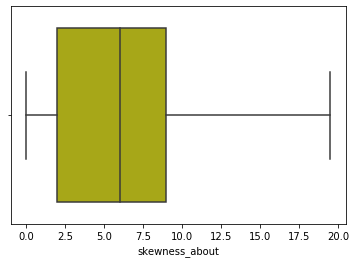

In [51]:
#Let us update the max.length_aspect_ratio to Q3+(1.5*IQR) for the outliers
a = np.array(vehicle_df['skewness_about'].values.tolist())
vehicle_df['skewness_about'] = np.where(a > q4, q3+(1.5*IQR), a).tolist()
sns.boxplot(data = vehicle_df,x='skewness_about', orient = 'h' ,color ='y') 
plt.show()

In [52]:
#skewness_about.1
q1 = np.quantile(vehicle_df['skewness_about.1'], 0.25)
q2 = np.quantile(vehicle_df['skewness_about.1'], 0.50)
q3 = np.quantile(vehicle_df['skewness_about.1'], 0.75)
IQR = q3 - q1
q4 = vehicle_df['skewness_about.1'].quantile(0.75) + (1.5*IQR)
print("skewness_about.1 above ", q4, "are outliers")
print("skewness_about.1 ", vehicle_df[vehicle_df['skewness_about.1'] > q4]['skewness_about.1'].shape[0])
vehicle_df[vehicle_df['skewness_about.1'] > q4]

skewness_about.1 above  40.0 are outliers
skewness_about.1  1


compactness  circularity  distance_circularity  radius_ratio  \
132           97         42.0                 101.0      5.225747   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
132              4.077537                      9.0          186.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
132           36.0                    22.0                        138   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
132         5.337538            6.23637                      168.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
132                     4.204693             7.0              41.0   

     skewness_about.2  hollows_ratio class  
132             194.0            206   car

C:\Users\gsrin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


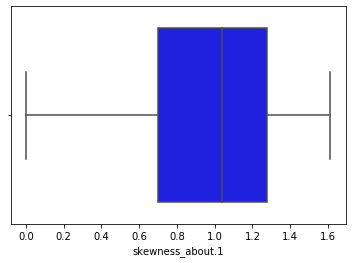

In [53]:
#apply log transform
vehicle_df['skewness_about.1'] = np.log10(vehicle_df['skewness_about.1'])
sns.boxplot(data = vehicle_df,x='skewness_about.1', orient = 'h',color = 'b') 
plt.show()

Since we have some 0 values, even though Outlier for skewness_about.1 has been cleared but we get a warning for log function. Hence we will reverse the log transformation back and then apply q3+(1.5*IQR) value for the outliers

In [54]:
vehicle_df['skewness_about.1'] = 10**vehicle_df['skewness_about.1']

In [55]:
#skewness_about
q1 = np.quantile(vehicle_df['skewness_about.1'], 0.25)
q2 = np.quantile(vehicle_df['skewness_about.1'], 0.50)
q3 = np.quantile(vehicle_df['skewness_about.1'], 0.75)
IQR = q3 - q1
q4 = vehicle_df['skewness_about.1'].quantile(0.75) + (1.5*IQR)
print("skewness_about.1 above ", q4, "are outliers")
print("skewness_about.1 ", vehicle_df[vehicle_df['skewness_about.1'] > q4]['skewness_about.1'].shape[0])
vehicle_df[vehicle_df['skewness_about.1'] > q4]

skewness_about.1 above  39.999999999999986 are outliers
skewness_about.1  2


compactness  circularity  distance_circularity  radius_ratio  \
132           97         42.0                 101.0      5.225747   
513           95         37.0                  71.0      5.141664   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
132              4.077537                      9.0          186.0   
513              4.110874                      9.0          157.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
132           36.0                    22.0                        138   
513           43.0                    20.0                        134   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
132         5.337538           6.236370                      168.0   
513         5.181784           5.899897                      125.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
132                     4.204693             7.0              41.0   
513                     4.143135             5.0              40.0   

     skewness_about.2  hollows_ratio class  
132             194.0            206   car  
513             196.0            208   car

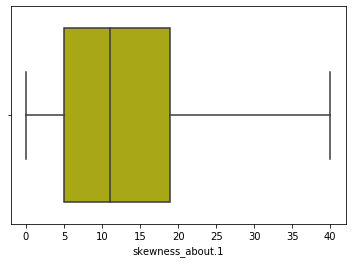

In [56]:
#Let us update the max.length_aspect_ratio to Q3+(1.5*IQR) for the outliers
a = np.array(vehicle_df['skewness_about.1'].values.tolist())
vehicle_df['skewness_about.1'] = np.where(a > q4, q3+(1.5*IQR), a).tolist()
sns.boxplot(data = vehicle_df,x='skewness_about.1', orient = 'h' ,color ='y') 
plt.show()

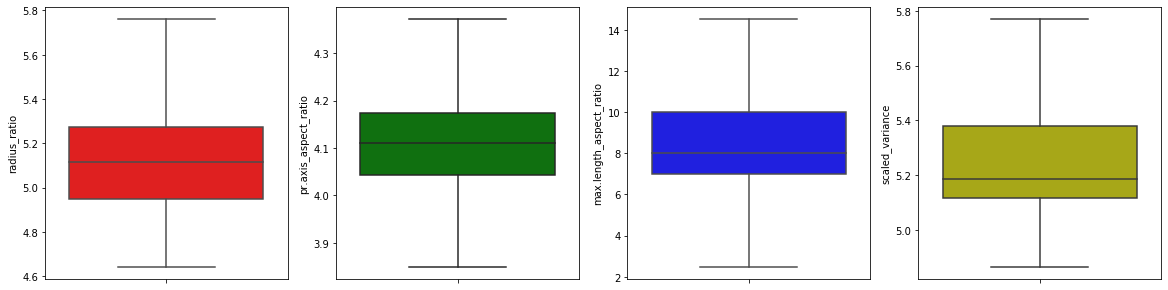

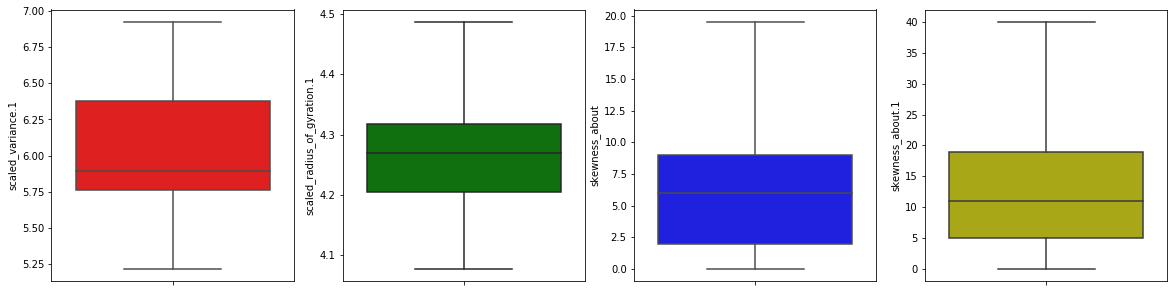

In [57]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
plt1=sns.boxplot(data = vehicle_df,x='radius_ratio', orient = 'v' , ax = ax[0],color = 'r') 
plt2=sns.boxplot(data = vehicle_df,x='pr.axis_aspect_ratio', orient = 'v' , ax = ax[1],color = 'g') 
plt3=sns.boxplot(data = vehicle_df,x='max.length_aspect_ratio', orient = 'v' , ax = ax[2],color = 'b') 
plt4=sns.boxplot(data = vehicle_df,x='scaled_variance', orient = 'v' , ax = ax[3],color ='y') 

fig, ax = plt.subplots(1,4, figsize=(20,5))
plt1=sns.boxplot(data = vehicle_df,x='scaled_variance.1', orient = 'v' , ax = ax[0],color = 'r') 
plt2=sns.boxplot(data = vehicle_df,x='scaled_radius_of_gyration.1', orient = 'v' , ax = ax[1],color = 'g') 
plt3=sns.boxplot(data = vehicle_df,x='skewness_about', orient = 'v' , ax = ax[2],color = 'b') 
plt4=sns.boxplot(data = vehicle_df,x='skewness_about.1', orient = 'v' , ax = ax[3],color ='y') 


Log transformation and adjusting the outliers helped.We shall continue with the model building

In [58]:
#Since we have multiple columns, lets group the columns and perform some sworm and box plot analysis
j = vehicle_df['class']                          
i = vehicle_df.loc[:, vehicle_df.columns != 'class']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

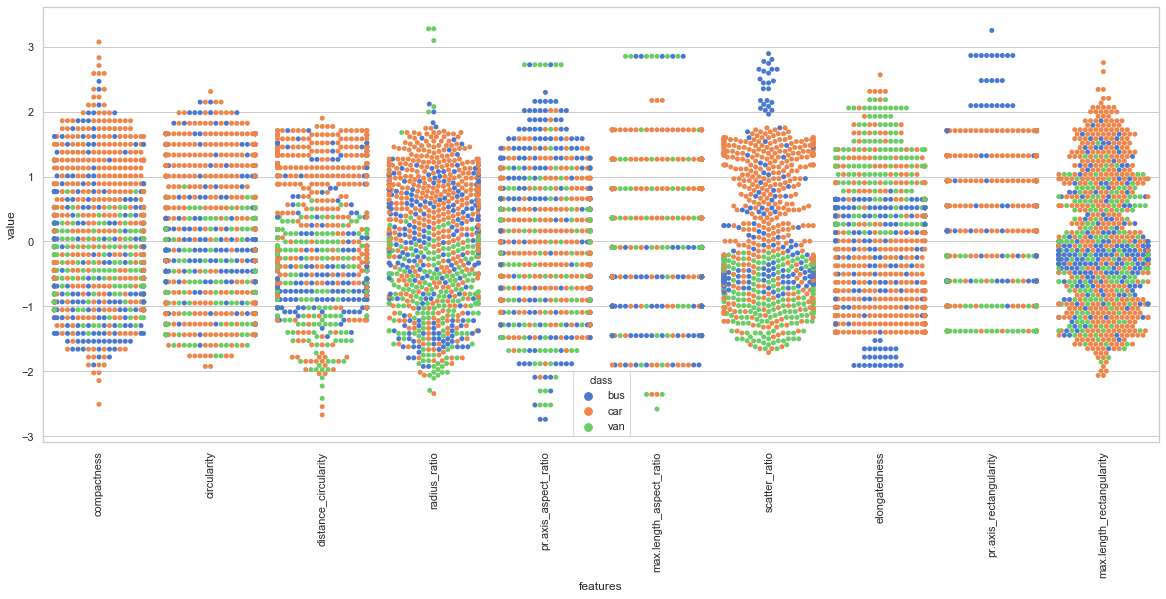

In [59]:
sns.set(style="whitegrid", palette="muted")
dataj = j
datai = i
data_istd = (datai - datai.mean()) / (datai.std())              # standardization of data 
#applying sworm plot for first 10  columns
datai = pd.concat([j,data_istd.iloc[:,0:10]],axis=1)
datai = pd.melt(datai,id_vars="class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,8))
sns.swarmplot(x="features", y="value", hue="class", data=datai)
plt.xticks(rotation=90)


From the above sworm plot we see that it is difficult to cluster the features by its class variable. However feature scatter_ratio has better groupings for a classification and may be an important feature for the clustering

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

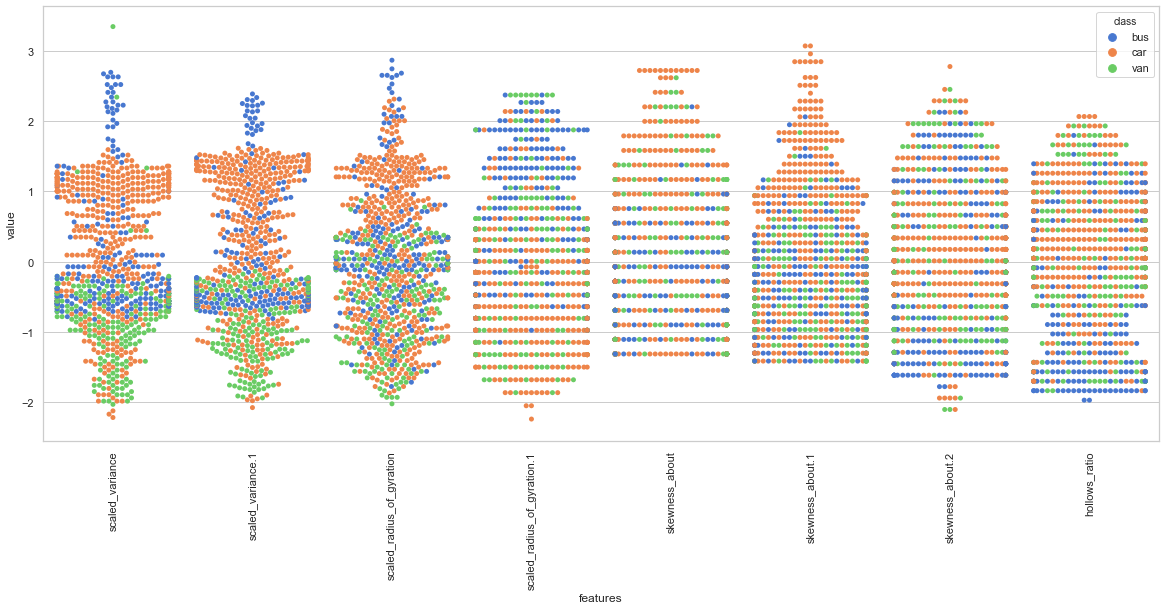

In [60]:
#applying sworm plot for remaining 8 columns
datai = pd.concat([j,data_istd.iloc[:,10:18]],axis=1)
datai = pd.melt(datai,id_vars="class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,8))
sns.swarmplot(x="features", y="value", hue="class", data=datai)
plt.xticks(rotation=90)


From this sworm plot above, scaled_variance, scaled_variance_1 have better groupings for clustering. We can further perform a scatter plot for the columns that has better groupings to understand the data better

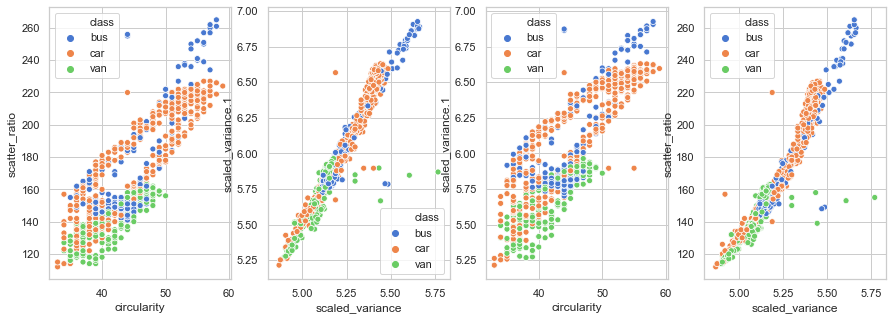

In [61]:
f, ax = plt.subplots(1,4, figsize=(15,5))
plt1 = sns.scatterplot(x = 'circularity', y = 'scatter_ratio', hue = 'class', data = vehicle_df,ax = ax[0]) 
plt2 = sns.scatterplot(x = 'scaled_variance', y = 'scaled_variance.1', hue = 'class', data = vehicle_df, ax = ax[1]) 
plt3 = sns.scatterplot(x = 'circularity', y = 'scaled_variance.1', hue = 'class', data = vehicle_df,ax = ax[2]) 
plt4 = sns.scatterplot(x = 'scaled_variance', y = 'scatter_ratio', hue = 'class', data = vehicle_df, ax = ax[3]) 
plt.show()


1. We see a positive correlation among the 4 feature
2. Additionally at lower values of the combination we see a clustering of Van and at higher values we see a clustering of bus with car in the mid range

# Feature Engineering

In [62]:
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split

In [63]:
X = vehicle_df.loc[:, vehicle_df.columns != 'class']
y = vehicle_df.loc[:, vehicle_df.columns == 'class']

# Split the data into Train and Test

In [64]:
#splitting the data in test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 7)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

# SVC Model

In [65]:
#SVC model
from sklearn.svm import SVC

svcmodel = SVC()
svcmodel.fit(X_train, y_train)
svcpredict = svcmodel.predict(X_test)
svcscore = svcmodel.score(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svcmodel.score(X_train, y_train)))
svcscore = svcmodel.score(X_test, y_test)
print("Accuracy on test set: {:.2f}".format(svcmodel.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.53


C:\Users\gsrin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion Matrix


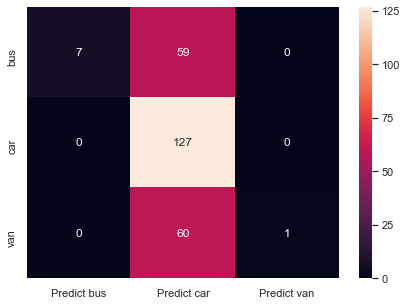

Classification Report
              precision    recall  f1-score   support

         bus       1.00      0.11      0.19        66
         car       0.52      1.00      0.68       127
         van       1.00      0.02      0.03        61

    accuracy                           0.53       254
   macro avg       0.84      0.37      0.30       254
weighted avg       0.76      0.53      0.40       254



In [66]:
print("Confusion Matrix")
SVCcm=metrics.confusion_matrix(y_test, svcpredict, labels=['bus','car','van'])
SVCcm
df_SVCcm = pd.DataFrame(SVCcm, index = [i for i in ['bus','car','van']],
                  columns = [i for i in ["Predict bus","Predict car","Predict van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_SVCcm, annot=True,fmt ='g')
plt.show()
print("Classification Report")
print(metrics.classification_report(y_test, svcpredict, labels=['bus','car','van']))

From the confusion matrix and classification report, accuracy is low and precision/recall and f1 score is low for different classes

In [67]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['SVC'], 'accuracy': svcscore*100.0})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method   accuracy
0    SVC  53.149606

# Scaling the data using the standard scaler and applying SVC


In [68]:
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [69]:
#SVC scaled model
from sklearn.svm import SVC

svcmodelscaled = SVC()
svcmodelscaled.fit(X_train_sd, y_train)
svcscaledpredict = svcmodelscaled.predict(X_test_sd)
svcscaledscore = svcmodelscaled.score(X_train_sd, y_train)
print("Accuracy on training set: {:.2f}".format(svcmodelscaled.score(X_train_sd, y_train)))
svcscaledscore = svcmodelscaled.score(X_test_sd, y_test)
print("Accuracy on test set: {:.2f}".format(svcmodelscaled.score(X_test_sd, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.96


Confusion Matrix


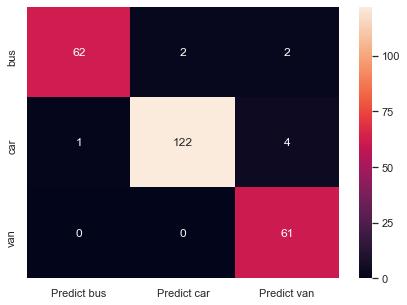

Classification Report
              precision    recall  f1-score   support

         bus       0.98      0.94      0.96        66
         car       0.98      0.96      0.97       127
         van       0.91      1.00      0.95        61

    accuracy                           0.96       254
   macro avg       0.96      0.97      0.96       254
weighted avg       0.97      0.96      0.96       254



In [70]:
print("Confusion Matrix")
SVCscaledcm=metrics.confusion_matrix(y_test, svcscaledpredict, labels=['bus','car','van'])
SVCscaledcm
df_SVCscaledcm = pd.DataFrame(SVCscaledcm, index = [i for i in ['bus','car','van']],
                  columns = [i for i in ["Predict bus","Predict car","Predict van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_SVCscaledcm, annot=True,fmt ='g')
plt.show()
print("Classification Report")
print(metrics.classification_report(y_test, svcscaledpredict, labels=['bus','car','van']))

After scaling the variables, we could see a huge improvement in the accuracy and precision/recall/f1 scores. 

In [71]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVC Scaled'], 'accuracy': [svcscaledscore*100.0]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method   accuracy
0         SVC  53.149606
0  SVC Scaled  96.456693

# SVM Hyper parameter Tuning Using Grid Search 

In [72]:
from sklearn.model_selection import GridSearchCV 
  
svcmodelscaled_grid = SVC()
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

grid = GridSearchCV(svcmodelscaled_grid, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train_sd, y_train) 

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.783, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\Users\gsrin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.813, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.786, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.955, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.980, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.980, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.944, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.964, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.980, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.955, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [73]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


The best parameters for SVC can be {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'} for this dataset

Confusion Matrix


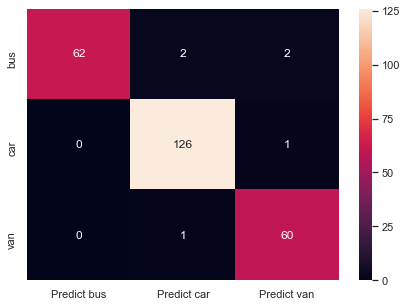

Classification Report
              precision    recall  f1-score   support

         bus       1.00      0.94      0.97        66
         car       0.98      0.99      0.98       127
         van       0.95      0.98      0.97        61

    accuracy                           0.98       254
   macro avg       0.98      0.97      0.97       254
weighted avg       0.98      0.98      0.98       254



In [74]:
grid_predictions = grid.predict(X_test_sd) 

print("Confusion Matrix")
SVCscaled_gridcm=metrics.confusion_matrix(y_test, grid_predictions, labels=['bus','car','van'])
SVCscaled_gridcm
df_SVCscaled_gridcm = pd.DataFrame(SVCscaled_gridcm, index = [i for i in ['bus','car','van']],
                  columns = [i for i in ["Predict bus","Predict car","Predict van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_SVCscaled_gridcm, annot=True,fmt ='g')
plt.show()
print("Classification Report")
print(metrics.classification_report(y_test, grid_predictions, labels=['bus','car','van']))

Accuracy has improved 1.2% after applying the best parameters with grid search

In [75]:
#Store the accuracy results for each model in a dataframe for final comparison
svcscaled_gridscore = grid.score(X_test_sd, y_test)
tempResultsDf = pd.DataFrame({'Method':['SVC Scaled Grid'], 'accuracy': [svcscaled_gridscore*100.0]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method   accuracy
0              SVC  53.149606
0       SVC Scaled  96.456693
0  SVC Scaled Grid  97.637795

# PCA Analysis

Finding Covariance matrix

In [76]:
#standardizing the X variables
#X_std = StandardScaler().fit_transform(X)

In [77]:
cov_matrix = np.cov(X_train_sd.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00169205  0.69255281  0.79733455  0.69329245  0.15395026  0.45462474
   0.81991179 -0.79274398  0.82296986  0.6939428   0.76207477  0.80990023
   0.59420609 -0.26486227  0.21136371  0.1261633   0.29731156  0.35905326]
 [ 0.69255281  1.00169205  0.79972482  0.63729879  0.20601683  0.54317546
   0.85040632 -0.82457531  0.84846367  0.96349864  0.808864    0.84202633
   0.92509916  0.04266693  0.13160836 -0.00529679 -0.08939568  0.06667871]
 [ 0.79733455  0.79972482  1.00169205  0.79011583  0.23051026  0.63145293
   0.91043495 -0.91866787  0.89851608  0.78590997  0.88296007  0.92137464
   0.71290688 -0.24847652  0.10963711  0.24619487  0.15711896  0.34431448]
 [ 0.69329245  0.63729879  0.79011583  1.00169205  0.69320536  0.54183265
   0.74985907 -0.81602953  0.71972649  0.59389679  0.81213576  0.78641367
   0.54386424 -0.35366153  0.02184274  0.17100331  0.42696465  0.52460045]
 [ 0.15395026  0.20601683  0.23051026  0.69320536  1.00169205  

Getting eigen values and eigen vector

In [78]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-2.70292461e-01  7.36016615e-02 -1.63306282e-01 -1.43304184e-01
   1.60365345e-01 -1.39557230e-01 -2.70164329e-01  7.67324692e-01
  -2.51236173e-01 -2.50330514e-01  3.20229074e-02  4.28722746e-02
   1.50870665e-01 -9.64796120e-02  7.58757355e-02  2.66568453e-02
  -1.25344776e-02  2.63763302e-03]
 [-2.86265927e-01 -1.34610656e-01 -1.28789038e-01  1.44303381e-01
  -1.10415734e-01 -3.30256178e-02  4.22457072e-01  9.01209516e-02
  -4.84727339e-02  1.14731969e-01  4.13560583e-02 -2.73522097e-01
   9.11218611e-02 -4.72175077e-01 -5.79052500e-01  5.44536453e-02
  -3.22094266e-02 -7.27910260e-03]
 [-3.02612997e-01  3.82199379e-02 -1.75391134e-03 -1.19795253e-01
  -9.83239070e-02 -4.20949327e-02 -1.19395453e-01 -2.80868763e-01
  -2.76344801e-01 -8.87764493e-02  7.99674063e-01  1.65628601e-01
  -7.54833081e-02  1.18359048e-01 -1.25326526e-01 -3.09802986e-02
   5.33380999e-03 -2.16289848e-02]
 [-2.69784086e-01  2.00455730e-01  1.90734986e-01  1.86797614e-01
   8.65653995e-02  2.

Getting the variance and cumulative variance

In [79]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.41467217  72.64104231  79.3908624   85.86090466  90.38149932
  94.37629055  96.30215262  97.5752216   98.31501413  98.79671293
  99.11051014  99.41299403  99.6077291   99.75699712  99.87481119
  99.95234096  99.98086687 100.        ]


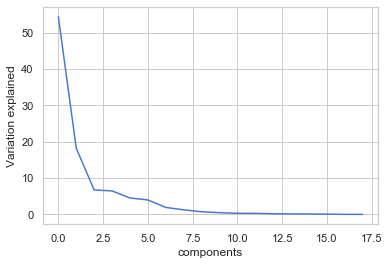

In [80]:
plt.plot(var_exp)
plt.ylabel('Variation explained')
plt.xlabel('components')
plt.show()

From the above elbow curve we can visualize that after ~8 components there isnt much of a change in variance and it says flat

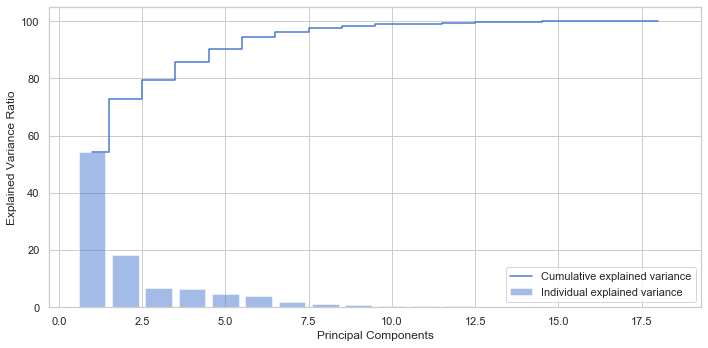

In [81]:
plt.figure(figsize=(10,5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

By looking at the cumulative ratio, after 8 principal components we see the variance has saturated. hence for our analysis we can consider 8 components

In [82]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(9.811213986834822,
  array([-0.27029246, -0.28626593, -0.302613  , -0.26978409, -0.10051663,
         -0.19197159, -0.30790645,  0.30868351, -0.30431764, -0.27918006,
         -0.30182917, -0.31001891, -0.26233787,  0.04832604, -0.0344562 ,
         -0.05380147, -0.04520146, -0.09242446])),
 (3.2862978039135156,
  array([ 0.07360166, -0.13461066,  0.03821994,  0.20045573,  0.24876876,
          0.09598382, -0.08260284,  0.01844543, -0.09710263, -0.12847398,
         -0.06868181, -0.05181083, -0.21763756, -0.49745036,  0.03859758,
          0.08188828,  0.50934981,  0.51065209])),
 (1.2170233994168573,
  array([-0.16330628, -0.12878904, -0.00175391,  0.19073499,  0.31975607,
         -0.07429644,  0.04883322, -0.08786648,  0.02847873, -0.15608565,
          0.13509468,  0.06516745, -0.13138457,  0.15277366, -0.74797071,
          0.38098114, -0.07946965, -0.05742258])),
 (1.1665781771976087,
  array([-0.14330418,  0.14430338, -0.11979525,  0.18679761,  0.55899845,
          0.11713373

In [83]:
# generating dimensionally reduced datasets (for 8 components)
w = np.hstack((eigen_pairs[0][1].reshape(18,1), 
                      eigen_pairs[1][1].reshape(18,1),
              eigen_pairs[2][1].reshape(18,1),
              eigen_pairs[3][1].reshape(18,1),
              eigen_pairs[4][1].reshape(18,1),
              eigen_pairs[5][1].reshape(18,1),
              eigen_pairs[6][1].reshape(18,1),
              eigen_pairs[7][1].reshape(18,1)))
print('Matrix W:\n', w)
X_sd_pca = X_train_sd.dot(w)
print(type(X_sd_pca))
X_test_sd_pca = X_test_sd.dot(w)
print(type(X_test_sd_pca))
print(w.shape)

Matrix W:
 [[-0.27029246  0.07360166 -0.16330628 -0.14330418  0.16036535 -0.13955723
  -0.27016433  0.76732469]
 [-0.28626593 -0.13461066 -0.12878904  0.14430338 -0.11041573 -0.03302562
   0.42245707  0.09012095]
 [-0.302613    0.03821994 -0.00175391 -0.11979525 -0.09832391 -0.04209493
  -0.11939545 -0.28086876]
 [-0.26978409  0.20045573  0.19073499  0.18679761  0.0865654   0.2116602
  -0.15181238 -0.03400785]
 [-0.10051663  0.24876876  0.31975607  0.55899845  0.0712712   0.5093741
   0.03953861  0.1277616 ]
 [-0.19197159  0.09598382 -0.07429644  0.11713373 -0.80536284 -0.00182084
  -0.37732924  0.00613128]
 [-0.30790645 -0.08260284  0.04883322 -0.11384272  0.13213256 -0.04610919
  -0.07907696 -0.07035159]
 [ 0.30868351  0.01844543 -0.08786648  0.04467825 -0.15089835  0.04504285
   0.08808211  0.23309879]
 [-0.30431764 -0.09710263  0.02847873 -0.13086725  0.11930691 -0.05988052
  -0.07466541 -0.00712132]
 [-0.27918006 -0.12847398 -0.15608565  0.1263261  -0.2290654  -0.08741914
   0.356

In [84]:
X_train_sd.shape, w.shape, X_sd_pca.shape, X_test_sd_pca.shape

((592, 18), (18, 8), (592, 8), (254, 8))

In [85]:
#fitting SVC with pca components
pca_clf = SVC()
pca_clf.fit(X_sd_pca, y_train)
pca_clfpredict = pca_clf.predict(X_test_sd_pca)
pca_clfscore = pca_clf.score(X_sd_pca, y_train)
print("Accuracy on training set: {:.2f}".format(pca_clf.score(X_sd_pca, y_train)))
pca_clfscore = pca_clf.score(X_test_sd_pca, y_test)
print("Accuracy on test set: {:.2f}".format(pca_clf.score(X_test_sd_pca, y_test)))

Accuracy on training set: 0.97
Accuracy on test set: 0.95


C:\Users\gsrin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion Matrix


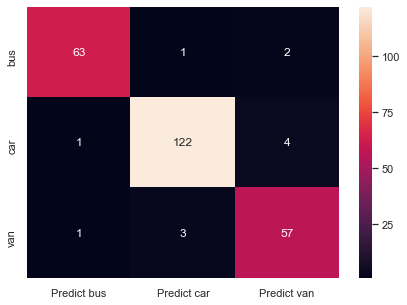

Classification Report
              precision    recall  f1-score   support

         bus       0.97      0.95      0.96        66
         car       0.97      0.96      0.96       127
         van       0.90      0.93      0.92        61

    accuracy                           0.95       254
   macro avg       0.95      0.95      0.95       254
weighted avg       0.95      0.95      0.95       254



In [86]:
print("Confusion Matrix")
pca_clfcm=metrics.confusion_matrix(y_test, pca_clfpredict, labels=['bus','car','van'])
pca_clfcm
df_pca_clfcm = pd.DataFrame(pca_clfcm, index = [i for i in ['bus','car','van']],
                  columns = [i for i in ["Predict bus","Predict car","Predict van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_pca_clfcm, annot=True,fmt ='g')
plt.show()
print("Classification Report")
print(metrics.classification_report(y_test, pca_clfpredict, labels=['bus','car','van']))

By dimensionally reducing 8 components we loose only 1% in accuracy from the original SVC model which was made with 16 components

In [87]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['PCA+SVC'], 'accuracy': [pca_clfscore*100.0]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method   accuracy
0              SVC  53.149606
0       SVC Scaled  96.456693
0  SVC Scaled Grid  97.637795
0          PCA+SVC  95.275591

# SVM Hyper parameter Tuning for dimensionality reduced Principle components Using Grid Search 

In [88]:
pca_clf_grid = SVC()
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

grid = GridSearchCV(pca_clf_grid, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_sd_pca, y_train) 

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.793, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.818, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.796, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

C:\Users\gsrin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.510, total=   0.0s
[CV] C

[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.954, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.944, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.924, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.944, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.960, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.894, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.939, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [89]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Confusion Matrix


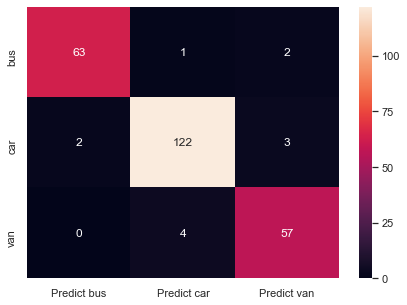

Classification Report
              precision    recall  f1-score   support

         bus       0.97      0.95      0.96        66
         car       0.96      0.96      0.96       127
         van       0.92      0.93      0.93        61

    accuracy                           0.95       254
   macro avg       0.95      0.95      0.95       254
weighted avg       0.95      0.95      0.95       254



In [90]:
grid_predictions = grid.predict(X_test_sd_pca) 

print("Confusion Matrix")
pca_clf_gridcm=metrics.confusion_matrix(y_test, grid_predictions, labels=['bus','car','van'])
pca_clf_gridcm
df_pca_clf_gridcm = pd.DataFrame(pca_clf_gridcm, index = [i for i in ['bus','car','van']],
                  columns = [i for i in ["Predict bus","Predict car","Predict van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_pca_clf_gridcm, annot=True,fmt ='g')
plt.show()
print("Classification Report")
print(metrics.classification_report(y_test, grid_predictions, labels=['bus','car','van']))

We could see here with the grid's best parameters and 8 components, we loose accuracy percentage only by 2%. But with dimensionally reduced components computationally we see that this model is less expensive when model is moved in production

In [91]:
#Store the accuracy results for each model in a dataframe for final comparison
pca_gridscore = grid.score(X_test_sd_pca, y_test)
tempResultsDf = pd.DataFrame({'Method':['PCA+Grid+SVC'], 'accuracy': [pca_gridscore*100.0]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method   accuracy
0              SVC  53.149606
0       SVC Scaled  96.456693
0  SVC Scaled Grid  97.637795
0          PCA+SVC  95.275591
0     PCA+Grid+SVC  95.275591

# Kfold

In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [93]:
kfold = KFold(n_splits = 10,random_state = 7)
model = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
results = cross_val_score(model, X_train_scaled, y_train, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 97.636% (1.551%)


In [94]:
y_test = np.ravel(y_test)
testresults = cross_val_score(model,X_test_scaled,y_test,cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (testresults.mean()*100.0, testresults.std()*100.0))

Accuracy: 97.631% (2.635%)


In [95]:
leastpossibleaccuracy = (testresults.mean() - (1.96*testresults.std()))*100
print("Least possible accuracy that we may get at 95% confidence interval",leastpossibleaccuracy)
highestpossibleaccuracy = (testresults.mean() + (1.96*testresults.std()))*100
print("Highest possible accuracy that we may get at 95% confidence interval",highestpossibleaccuracy)

Least possible accuracy that we may get at 95% confidence interval 92.46538810012146
Highest possible accuracy that we may get at 95% confidence interval 102.796150361417


With this we can say that the model will predict between 92% to 100% on 95% of the time in production

In [96]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Kfold'], 'accuracy': [testresults.mean()*100.0]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method   accuracy
0              SVC  53.149606
0       SVC Scaled  96.456693
0  SVC Scaled Grid  97.637795
0          PCA+SVC  95.275591
0     PCA+Grid+SVC  95.275591
0            Kfold  97.630769

# Summary

With PCA we have reduced the dimensionality to 8 components which is computationally less expensive and could achieve approx 95% accuracy with high precision/recall and F1 scores. 
